<a href="https://colab.research.google.com/github/lucasabbade93/Data_science/blob/main/MVP_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A) Machine Learning: Problema de Regressão**

> 1) Definição do problema



Neste projeto será dada sequência à analise iniciada no MVP anterior.

 O ponto de partida será a partir da etapa de pré-processamento do MVP I.


Segue o link para o MVP I:

https://github.com/lucasabbade93/Data_science/blob/main/MVP_I.ipynb


O dataset analisado consiste em uma amostra de acomodações de Airbnb de 9 cidades européias, cuja variável de saída é o preço da diária (Y) e as variáveis de entradas são diversas características das acomodações, como por exemplo a capaciade de pessoas, a nota de satisfação do cliente, proximidade ao centro, tipo da acomodação dentre outras.

Este projeto consiste em um problema de regressão, uma vez que a varíal de saída é numérica e contínua. Deste modo, serão implementados diversos modelos de machine learning a fim de identificar o que melhor descreve o comportamento de definição de preços das acomodações.

A hipótese levantada neste projeto é que o Preço das acomodações é afetado pela localização, capacidade de pessoas, tipo de acomodação, cidade, dentre outras variáveis.

O dataset analisado está restrito à uma amostra de acomodações Airbnb de 9 cidades européias, como será mostrado a adiante.

> Definição dos atributos do Dataset:

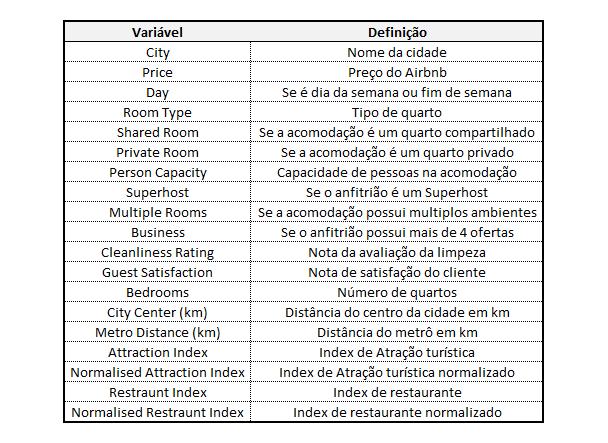

> 2) Preparação de Dados

In [ ]:
# importar bibliotecas
import pandas as pd
# mostrar todas as colunas nos dataframes
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV

In [ ]:
# url dos dados no github
url = "https://raw.githubusercontent.com/lucasabbade93/Data_science/main/Aemf1.csv"

# importação dos dados
df = pd.read_csv(url)

# verificar as primeiras linhas
df.head(10)

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
5,Amsterdam,552.808567,Weekday,Private room,False,True,3.0,False,0,0,8.0,100.0,2,2.131420,1.904668,174.788957,9.255191,225.201662,15.692376
6,Amsterdam,215.124317,Weekday,Private room,False,True,2.0,False,0,0,10.0,94.0,1,1.881092,0.729747,200.167652,10.599010,242.765524,16.916251
7,Amsterdam,2771.307384,Weekday,Entire home/apt,False,False,4.0,True,0,0,10.0,100.0,3,1.686807,1.458404,208.808109,11.056528,272.313823,18.975219
8,Amsterdam,1001.804420,Weekday,Entire home/apt,False,False,4.0,False,0,0,9.0,96.0,2,3.719141,1.196112,106.226456,5.624761,133.876202,9.328686
9,Amsterdam,276.521454,Weekday,Private room,False,True,2.0,False,1,0,10.0,88.0,1,3.142361,0.924404,206.252862,10.921226,238.291258,16.604478


>> 2.1) Pré-processamentos



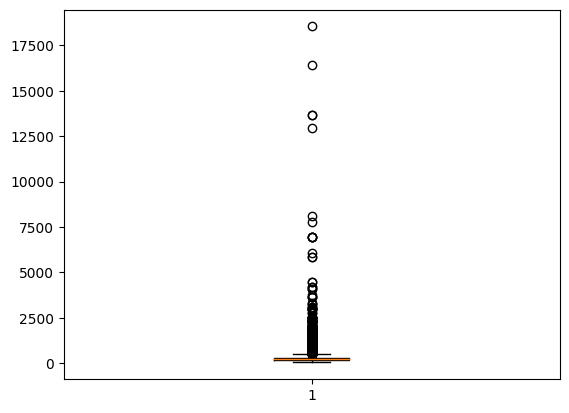

In [ ]:
# Definir whiskers
whisker_ends = [whisker.get_ydata() for whisker in plt.boxplot(df['Price'])['whiskers']]
upper_whisker = whisker_ends[1][1]
lower_whisker = whisker_ends[0][1]

# Remover outliers
df_1 = df[(df['Price'] > lower_whisker) & (df['Price'] < upper_whisker)].reset_index(drop=True)

In [ ]:
# Remover as colunas redundantes
df_limp = df_1.drop(['Normalised Attraction Index', 'Normalised Restraunt Index', 'Shared Room', 'Private Room'], axis=1)

# formatar variáveis como número inteiro
df_limp['Person Capacity'] = df_limp['Person Capacity'].astype(int)
df_limp['Superhost'] = df_limp['Superhost'].astype(int)
df_limp['Multiple Rooms'] = df_limp['Multiple Rooms'].astype(int)
df_limp['Business'] = df_limp['Business'].astype(int)
df_limp['Cleanliness Rating'] = df_limp['Cleanliness Rating'].astype(int)
df_limp['Bedrooms'] = df_limp['Bedrooms'].astype(int)

# definir colunas para encoding
cols_to_encod = ['City', 'Day', 'Room Type', 'Person Capacity', 'Cleanliness Rating']

# definir o encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Encaixar o encoder com os dados para pegar as categorias de cada variável
encoder.fit(df_limp[cols_to_encod])

# transformar as variáveis categóricas com OneHotEncoder
df_encod = encoder.transform(df_limp[cols_to_encod])

# Pegar os nomes das colunas
col_names = encoder.get_feature_names_out(cols_to_encod)

# converter colunas em dataframe e inteiro
df_encod = pd.DataFrame(df_encod.astype(int), columns=col_names.astype(str))

# concatenar as colunas transpostas com as demais colunas
df_pp = pd.concat([df_limp.drop(cols_to_encod, axis=1), df_encod], axis=1)

# ver a tabela
df_pp



,Price,Superhost,Multiple Rooms,Business,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Restraunt Index,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Budapest,City_Lisbon,City_Paris,City_Rome,City_Vienna,Day_Weekday,Day_Weekend,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room,Person Capacity_2,Person Capacity_3,Person Capacity_4,Person Capacity_5,Person Capacity_6,Cleanliness Rating_2,Cleanliness Rating_3,Cleanliness Rating_4,Cleanliness Rating_5,Cleanliness Rating_6,Cleanliness Rating_7,Cleanliness Rating_8,Cleanliness Rating_9,Cleanliness Rating_10
0,194.033698,0,1,0,93.0,1,5.022964,2.539380,78.690379,98.253896,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,344.245776,0,0,0,85.0,1,0.488389,0.239404,631.176378,837.280757,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,264.101422,0,0,1,87.0,1,5.748312,3.651621,75.275877,95.386955,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,433.529398,0,0,1,90.0,2,0.384862,0.439876,493.272534,875.033098,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,485.552926,1,0,0,98.0,1,0.544738,0.318693,552.830324,815.305740,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38814,463.501858,0,1,0,90.0,2,1.021878,0.285141,176.754900,283.426459,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
38815,115.933899,0,1,0,94.0,1,3.041932,0.308192,109.751387,208.517887,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
38816,304.793960,0,0,0,86.0,1,0.810205,0.100839,204.970121,342.182813,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
38817,301.054157,0,0,0,87.0,1,3.044100,0.287435,109.236574,158.563398,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


Antes de começar a preparação para o modelo de Machine Learning foi necessário a aplicação do pré-processamento de dados acima, que havia sido feito no MVP anterior. Foram excluídos os outliers e algumas colunas redundantes, além de ser aplicado OneHotEncoding nas variáveis categóricas do dataset. A normalização das colunas núméricas só será aplicada após a separação entre grupos de treino e teste, a fim de evitar data leakage.

>> 2.2) Separação entre grupos de treino e teste

In [ ]:
# tamanho do conjunto de teste
test_size = 0.2

# semente aleatória
seed = 7

# numero de estimadores
num_trees = 100

# Separação das variáveis explicativas (x) e a variável dependente (y)
array = df_pp.values
x = array[:,1:38]
y = array[:,0]

# Divisão entre bases de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, shuffle=True, random_state=seed)

# Parâmetro de Comparação de RMSE e R2
scoring = {
    'RMSE': make_scorer(mean_squared_error, squared=False),
    'R2': make_scorer(r2_score)
}

# numero de partições na validação cruzada
num_particoes = 10

# validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=seed)

Definiu-se inicialmente uma divisão entre grupos de treino e teste, com teste em 20%. Separou-se as variáveis entre x e y e estabeleceu-se métricas que serão utilizadas para avaliar os modelos a serem testados (RMSE e R2). Optou-se por RMSE (ao invés de MSE) por este estar na mesma unidade que a variável target de modo a facilitar a identificação se há com problema de underfitting.

Por fim, foi definida a validação cruzada em 10 partições, a fim de obter uma melhor captura das regularidades dos dados de treinamento, mas também generalizar bem para dados desconhecidos (conjunto de teste).

> 3) Modelagem e treinamento

>> 3.1) Escolha do melhor modelo

In [ ]:
# Criando os modelos para o VotingRegressor
bases = []
bases.append(('linear', LinearRegression()))
bases.append(('cart', DecisionTreeRegressor()))
bases.append(('svm', SVR()))

# Definição do StandardScaler (Normalização)
scaler = MinMaxScaler()

# Criando os modelos clássicos
reg_lr = ('LR', LinearRegression())
reg_ridge = ('Ridge', Ridge())
reg_lasso = ('Lasso', Lasso())
knn = ('KNN', KNeighborsRegressor())
cart = ('CART', DecisionTreeRegressor())
svm = ('SVM', SVR())

# Criando os modelos Enssembles
bagging = ('Bag', BaggingRegressor(base_estimator=DecisionTreeRegressor()))
random_forest = ('RF', RandomForestRegressor(n_estimators=num_trees))
extra_trees = ('ET', ExtraTreesRegressor(n_estimators=num_trees))
adaboost = ('Ada', AdaBoostRegressor(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingRegressor(n_estimators=num_trees))
voting = ('Voting', VotingRegressor(bases))

# Dataset Normalizado
pipelines = []
pipelines.append(('LR-norm', Pipeline([('scaler', scaler), reg_lr])))
pipelines.append(('Ridge-norm', Pipeline([('scaler', scaler), reg_ridge])))
pipelines.append(('Lasso-norm', Pipeline([('scaler', scaler), reg_lasso])))
pipelines.append(('KNN-norm', Pipeline([('scaler', scaler), knn])))
pipelines.append(('CART-norm', Pipeline([('scaler', scaler), cart])))
pipelines.append(('SVM-norm', Pipeline([('scaler', scaler), svm])))
pipelines.append(('Bag-norm', Pipeline([('scaler', scaler), bagging])))
pipelines.append(('RF-norm', Pipeline([('scaler', scaler), random_forest])))
pipelines.append(('ET-norm', Pipeline([('scaler', scaler), extra_trees])))
pipelines.append(('Ada-norm', Pipeline([('scaler', scaler), adaboost])))
pipelines.append(('GB-norm', Pipeline([('scaler', scaler), gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([('scaler', scaler), voting])))

results = []
names = []

# Gerar resultados do treino
for name, model in pipelines:
    cv_results = cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: R2=%.2f%%, RMSE=%.2f, Y_mean=%.2f, SI=%.2f%%" % (name, cv_results['test_R2'].mean()*100, cv_results['test_RMSE'].mean(), df_pp['Price'].mean(), cv_results['test_RMSE'].mean()/df_pp['Price'].mean()*100)
    print(msg)


LR-norm: R2=57.65%, RMSE=64.96, Y_mean=216.20, SI=30.05%
Ridge-norm: R2=57.74%, RMSE=64.89, Y_mean=216.20, SI=30.01%
Lasso-norm: R2=49.72%, RMSE=70.78, Y_mean=216.20, SI=32.74%
KNN-norm: R2=55.80%, RMSE=66.36, Y_mean=216.20, SI=30.69%
CART-norm: R2=61.25%, RMSE=62.13, Y_mean=216.20, SI=28.74%
SVM-norm: R2=46.26%, RMSE=73.17, Y_mean=216.20, SI=33.85%
Bag-norm: R2=74.81%, RMSE=50.09, Y_mean=216.20, SI=23.17%
RF-norm: R2=77.38%, RMSE=47.47, Y_mean=216.20, SI=21.96%
ET-norm: R2=77.20%, RMSE=47.66, Y_mean=216.20, SI=22.04%
Ada-norm: R2=22.81%, RMSE=87.66, Y_mean=216.20, SI=40.55%
GB-norm: R2=62.21%, RMSE=61.36, Y_mean=216.20, SI=28.38%
Vot-norm: R2=67.87%, RMSE=56.57, Y_mean=216.20, SI=26.17%


Nesta etapa foram aplicados 12 modelos, dos quais os 6 primeiros tratam-se de algoritmos de machine learning para regressão e os 6 últimos são Ensembles (modelos mais avançados formados a partir da combinação de multiplos modelos de machine learning). Conforme esperado, os Ensembles obtiveram um resultado superior na média.

Estes modelos foram utilizados por serem todos aplicáveis ao problema e Regressão e apresentarem cada um deles uma abordagem diferente a respeito dos dados. A Regressão Linear e suas extensões (Ridge e Lasso) foram aplicadas por serem as técnicas mais clássicas e de fácil interpretação, porém são mais apropriadas para relações lineares entre as variáveis. O modelo de KNN foi testado por ser aplicável a relações não lineares entre as variáveis e quando a proximidade entre os pontos pode fornecer informações úteis para prever a variável de saída. Já a Arvore de decisão foi implementada por possibilitar uma abordagem não linear entre as variáveis de entrada e a variável de saída e ser um modelo relativamente simples que utiliza amostras das características dos dados para criar regras de decisão. Já o Ensemble Bagging e suas variações (Random Forest e Extra trees) foram utilizados por utilizarem a combinação de diversos modelos de um mesmo tipo (Árvore de decisão, no caso) e treina-los em subamostras do conjunto de dados, obtendo, normalmente, melhores resultados no modelo. Os modelos Ensembles de Boosting (AdaBoost e Gradient Boosting) foram utilizados por se tratarem da combinação sequencial de modelos na qual cada um vai orrigindo os erros anteriores. Por fim, também foi testado o modelo de Voting que gera uma média dos resultados dos modelos selecionados e normalmente obtém melhores resultados do que cada modelo individualmente.

É importante ressaltar que realizou-se a normalização dos dados de forma independente entre treino e teste, a fim de evitar data leakage. Sendo assim, destaca-se a escolha pela Normalização pois conforme foi identificado no MVP I, as variáveis numéricas não possuem distribuição Normal. Além disso, foi aplicada diretamente a avaliação dos modelos com a normalização por ter conhecimento prévio de que desta forma obtém-se melhores resultados nos modelos, uma vez as variáveis numéricas são colocadas em uma mesma escala, evitando o a aplicação de um peso maior para uma delas de forma indevida.

Em seguida serão plotados os box-plots dos RMSE dos modelos para facilitar a visualização.

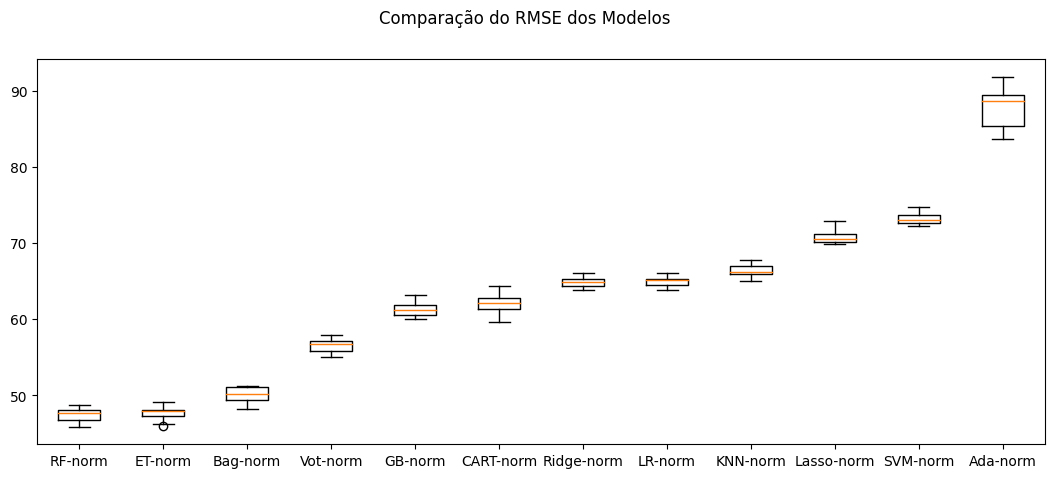

In [ ]:
# Selecionar o RMSE nos resultados
data = {
    'LR-norm': results[0]['test_RMSE'],
    'Ridge-norm': results[1]['test_RMSE'],
    'Lasso-norm': results[2]['test_RMSE'],
    'KNN-norm': results[3]['test_RMSE'],
    'CART-norm': results[4]['test_RMSE'],
    'SVM-norm': results[5]['test_RMSE'],
    'Bag-norm': results[6]['test_RMSE'],
    'RF-norm': results[7]['test_RMSE'],
    'ET-norm': results[8]['test_RMSE'],
    'Ada-norm': results[9]['test_RMSE'],
    'GB-norm': results[10]['test_RMSE'],
    'Vot-norm': results[11]['test_RMSE']
}

# gerar df com RMSE dos resultados
df_results = pd.DataFrame(data)

# Ordenar as colunas com base nos valores das medianas dos RMSE
df_results_sorted = df_results[df_results.median().sort_values(ascending=True).index]

# Boxplot dos RMSE ordenados
fig = plt.figure(figsize=(13, 5))
fig.suptitle('Comparação do RMSE dos Modelos')
ax = fig.add_subplot(111)
ax.boxplot(df_results_sorted)
ax.set_xticklabels(df_results_sorted)
plt.show()


Ao observar o gráfico acima, fica claro que os Ensembles obtiveram os melhores resultados, com exceção para AdaBoost, que obteve o pior resultado.

Destaca-se que os três melhores modelos são modelos de Bagging (Bagging padrão, Extra Trees e Random Forest) com RMSE em torno de 50.

Deste modo, será testado em seguida se a composição de um Voting com estes 3 modelos gera um resultado superior.

In [ ]:
# Criar novo Voting com os 3 melhores modelos
bases = []
bases.append(('RF', RandomForestRegressor()))
bases.append(('ET', ExtraTreesRegressor()))
bases.append(('Bag', BaggingRegressor()))

# Definição do StandardScaler (Normalização)
scaler = MinMaxScaler()

# Criando os modelos Enssembles
random_forest = ('RF', RandomForestRegressor(n_estimators=num_trees))
extra_trees = ('ET', ExtraTreesRegressor(n_estimators=num_trees))
bagging = ('Bag', BaggingRegressor(base_estimator=DecisionTreeRegressor()))
voting = ('Voting', VotingRegressor(bases))

# Dataset Normalizado
pipelines = []
pipelines.append(('RF-norm', Pipeline([('scaler', scaler), random_forest])))
pipelines.append(('ET-norm', Pipeline([('scaler', scaler), extra_trees])))
pipelines.append(('Bag-norm', Pipeline([('scaler', scaler), bagging])))
pipelines.append(('Vot-norm', Pipeline([('scaler', scaler), voting])))


results = []
names = []

# Gerar resultados do treino
for name, model in pipelines:
    cv_results = cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: R2=%.2f%%, RMSE=%.2f, Y_mean=%.2f, SI=%.2f%%" % (name, cv_results['test_R2'].mean()*100, cv_results['test_RMSE'].mean(), df_pp['Price'].mean(), cv_results['test_RMSE'].mean()/df_pp['Price'].mean()*100)
    print(msg)


RF-norm: R2=77.48%, RMSE=47.37, Y_mean=216.20, SI=21.91%
ET-norm: R2=77.22%, RMSE=47.63, Y_mean=216.20, SI=22.03%
Bag-norm: R2=74.54%, RMSE=50.36, Y_mean=216.20, SI=23.29%
Vot-norm: R2=78.11%, RMSE=46.69, Y_mean=216.20, SI=21.60%


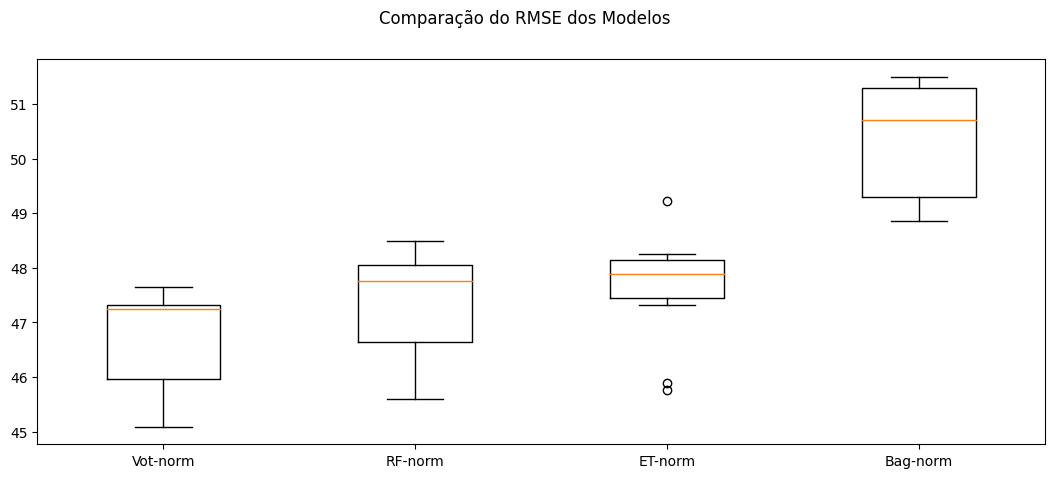

In [ ]:
# Selecionar o RMSE nos resultados
data = {
    'RF-norm': results[0]['test_RMSE'],
    'ET-norm': results[1]['test_RMSE'],
    'Bag-norm': results[2]['test_RMSE'],
    'Vot-norm': results[3]['test_RMSE']
}

# gerar df com RMSE dos resultados
df_results = pd.DataFrame(data)

# Ordenar as colunas com base nos valores das medianas dos RMSE
df_results_sorted = df_results[df_results.median().sort_values(ascending=True).index]

# Display the sorted DataFrame
fig = plt.figure(figsize=(13, 5))
fig.suptitle('Comparação do RMSE dos Modelos')
ax = fig.add_subplot(111)
ax.boxplot(df_results_sorted)
ax.set_xticklabels(df_results_sorted)
plt.show()


De fato a hipotese levantada anteriormente foi confirmada. A composição de um modelo Voting com os três melhores modelos obteve um resultado superior a cada um dos modelos individualmente, com o maior R2 e o menor RMSE.

>> 3.2) Feature Selection

In [ ]:
# Criação do modelo para seleção de atributos
modelo = ExtraTreesRegressor(n_estimators=num_trees)
modelo.fit(x,y)

# Criar DataFrame a partir de feature_importances_
df_feature_importances = pd.DataFrame(modelo.feature_importances_, columns=["Importance"])

# colocar os nomes das colunas
df_feature_importances["Feature"] = df_pp.columns[1:]

# ordenar o Dataframe baseado na Importance
df_feature_importances = df_feature_importances.sort_values(by="Importance", ascending=False)

# colocar as colunas na ordem
df_feature_importances = df_feature_importances[["Feature", "Importance"]]

df_feature_importances


,Feature,Importance
15,City_Paris,0.112477
8,Restraunt Index,0.089107
7,Attraction Index,0.085438
9,City_Amsterdam,0.075677
10,City_Athens,0.074986
5,City Center (km),0.073651
20,Room Type_Entire home/apt,0.069236
6,Metro Distance (km),0.054074
3,Guest Satisfaction,0.050670
13,City_Budapest,0.044088


Para a seleção de Variáveis foi definido o corte de Importância > 0.005, uma vez que as variáveis que estão abaixo desta linha de corte possuem pouco peso na composição do modelo e vão de encontro com as variáveis observadas como menos importantes no MVP I. Contudo, as duas variáveis que são encoding para Cidades e estão no grupo de variáveis excluídas serão mantidas no modelo (City_Vienna e City_Lisbon), já que foi observada uma grande correlação entre 'City' e 'Price' no MVP I, antes de realizar-se o One-hot-encoding de City.

In [ ]:
# Feature Selection
# Lista de colunas para remover
columns_to_remove = df_feature_importances.loc[(df_feature_importances["Importance"] <= 0.005) & (~df_feature_importances["Feature"].str.startswith("City")), "Feature"].tolist()

# Remover colunas do df_pp
df_pp_FS = df_pp.drop(columns=columns_to_remove)

# Separação das variáveis explicativas (x) e a variável dependente (y)
array_FS = df_pp_FS.values
x_FS = array_FS[:,1:38]
y_FS = array_FS[:,0]

# Criando os modelos para o VotingRegressor
bases = []
bases.append(('RF', RandomForestRegressor()))
bases.append(('ET', ExtraTreesRegressor()))
bases.append(('Bag', BaggingRegressor()))

# Criar o modelo de Regressão Voting
voting = ('Voting', VotingRegressor(bases))

# Modelo com dataset Normalizado
pipelines = []
pipelines.append(('Vot-norm', Pipeline([('scaler', scaler), voting])))

# Lista de tamanho de teste para comparar
test_sizes = [0.1, 0.2]

# Lista do numero de partições para comparar
num_particoes = [10, 5, 3]

# Comparação sobre tamanhos de teste e número de partições
for size in test_sizes:
    for particoes in num_particoes:
        # Divisão entre bases de treino e teste
        x_train, x_test, y_train, y_test = train_test_split(x_FS, y_FS, test_size=size, shuffle=True, random_state=seed)

        # Validação cruzada
        kfold = KFold(n_splits=particoes, shuffle=True, random_state=seed)

        results = []
        names = []
        # Gerar resultados do treino
        for name, model in pipelines:
            cv_results = cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)
            results.append(cv_results)
            names.append(name)
            msg = "%s (Test Size: %.2f, Partitions: %d): R2=%.2f%%, RMSE=%.2f, Y_mean=%.2f, SI=%.2f%%" % (name, size, particoes, cv_results['test_R2'].mean()*100, cv_results['test_RMSE'].mean(), df_pp['Price'].mean(), cv_results['test_RMSE'].mean()/df_pp['Price'].mean()*100)
            print(msg)


Vot-norm (Test Size: 0.10, Partitions: 10): R2=81.33%, RMSE=43.16, Y_mean=216.20, SI=19.96%
Vot-norm (Test Size: 0.10, Partitions: 5): R2=79.20%, RMSE=45.57, Y_mean=216.20, SI=21.08%
Vot-norm (Test Size: 0.10, Partitions: 3): R2=76.57%, RMSE=48.36, Y_mean=216.20, SI=22.37%
Vot-norm (Test Size: 0.20, Partitions: 10): R2=79.54%, RMSE=45.14, Y_mean=216.20, SI=20.88%
Vot-norm (Test Size: 0.20, Partitions: 5): R2=77.77%, RMSE=47.07, Y_mean=216.20, SI=21.77%
Vot-norm (Test Size: 0.20, Partitions: 3): R2=75.06%, RMSE=49.86, Y_mean=216.20, SI=23.06%


Nesta etapa, foi feita a exclusão das variáveis menos importantes (feature selection) e testado o resultado dos modelos para os tamanhos de teste 10% e 20%, além de partições 3, 5 ou 10 na validação cruzada. Anteriormente, foi usado teste = 20% e partições = 10, onde neste modelo com exclusão de variáveis observa-se uma redução no RMSE e aumento no R2, o que representa uma melhora no modelo após a etapa de feature selection.

Além disso, observa-se uma melhora ainda maior quando reduz-se o tamanho do teste para 10% e mantém as partições em 10. Com estes parametros, o R2 passou de 80% e a razão entre o RMSE e a média da variável de saída (Scatter Index) ficou abaixo de 20% pela primeira vez, indicando que o modelo não apresenta underfitting.

Ainda assim, na próxima etapa serão testadas formas para otimizar os hiperparâmentros do modelo que está sendo definido.

>> 3.3) Otimização de hiperparâmetros

In [ ]:
# tamanho do conjunto de teste
test_size = 0.1

# Divisão entre bases de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x_FS, y_FS, test_size=test_size, shuffle=True, random_state=seed)

# numero de partições na validação cruzada
num_particoes = 10

# validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=seed)

# Define o grid de parâmetros
param_grid_OH = {
    'n_estimators': [200, 100, 50],
    'max_features': [1, 0.5]
}


# Dataset Normalizado
pipelines_OH = []
for n_est in param_grid_OH['n_estimators']:
    for max_feat in param_grid_OH['max_features']:
        pipelines_OH.append((f"RF: n_estimators={n_est}, max_features={max_feat}", Pipeline([('scaler', scaler), ('RF', RandomForestRegressor(n_estimators=n_est, max_features=max_feat))])))
        pipelines_OH.append((f"ET: n_estimators={n_est}, max_features={max_feat}", Pipeline([('scaler', scaler), ('ET', ExtraTreesRegressor(n_estimators=n_est, max_features=max_feat))])))
        pipelines_OH.append((f"Bag: n_estimators={int(n_est/10)}, max_features={max_feat}", Pipeline([('scaler', scaler), ('Bag', BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=int(n_est/10), max_features=max_feat))])))
#obs.: n_est no bagging é dividido por 10 pq o padrão é 10 e não 100 como nos outros 2 modelos

results_OH = []
names_OH = []

# Gerar resultados do treino
for name, model in pipelines_OH:
    cv_results_OH = cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)
    results_OH.append(cv_results_OH)
    names_OH.append(name)
    msg = "%s: R2=%.2f%%, RMSE=%.2f, Y_mean=%.2f, SI=%.2f%%" % (
        name, cv_results_OH['test_R2'].mean() * 100, cv_results_OH['test_RMSE'].mean(), df_pp['Price'].mean(), cv_results_OH['test_RMSE'].mean() / df_pp['Price'].mean() * 100)
    print(msg)


RF: n_estimators=200, max_features=1: R2=79.47%, RMSE=45.26, Y_mean=216.20, SI=20.93%
ET: n_estimators=200, max_features=1: R2=81.53%, RMSE=42.94, Y_mean=216.20, SI=19.86%
Bag: n_estimators=20, max_features=1: R2=12.33%, RMSE=93.53, Y_mean=216.20, SI=43.26%
RF: n_estimators=200, max_features=0.5: R2=80.60%, RMSE=44.00, Y_mean=216.20, SI=20.35%
ET: n_estimators=200, max_features=0.5: R2=81.90%, RMSE=42.50, Y_mean=216.20, SI=19.66%
Bag: n_estimators=20, max_features=0.5: R2=75.19%, RMSE=49.76, Y_mean=216.20, SI=23.02%
RF: n_estimators=100, max_features=1: R2=79.18%, RMSE=45.58, Y_mean=216.20, SI=21.08%
ET: n_estimators=100, max_features=1: R2=81.47%, RMSE=43.01, Y_mean=216.20, SI=19.89%
Bag: n_estimators=10, max_features=1: R2=11.01%, RMSE=94.18, Y_mean=216.20, SI=43.56%
RF: n_estimators=100, max_features=0.5: R2=80.46%, RMSE=44.16, Y_mean=216.20, SI=20.42%
ET: n_estimators=100, max_features=0.5: R2=81.80%, RMSE=42.61, Y_mean=216.20, SI=19.71%
Bag: n_estimators=10, max_features=0.5: R2=7

Devido ao tamanho do dataset e a complexidade dos modelos escolhidos, o processamento ficou muito pesado e não foi possível a aplicação de otimização dos hiperparâmetros com biblioteca Grid Search. Sendo assim, definiu-se um grid de himperparâmetros aos quais aplicou-se loops para analisar quais combinações de parametros otimizaram os modelos. Desse modo, concluiu-se que n_estimators e max_features impactavam mais os modelos, uma vez que estes referem-se número de estimadores e o número máximo de variáveis quando o modelo busca a melhor separação respectivamente (obs.: ao definirmos max_features em um intervalo entre 0 e 1 somente uma fração das features são consideradas em cada split do modelo).

Ao observar os resultados acima, percebe-se que n_estimators=200 (20 no caso do bagging) e max_features=0.5 geram melhores modelos.

Deste modo, em seguida serão aplicados estes himperparâmetros na composição do modelo de Voting final.

In [ ]:
# tamanho do conjunto de teste
test_size = 0.1

# Divisão entre bases de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x_FS, y_FS, test_size=test_size, shuffle=True, random_state=seed)

# numero de partições na validação cruzada
num_particoes = 10

# validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=seed)

# Criar novo Voting com os 3 melhores modelos
bases = []
bases.append(('RF', RandomForestRegressor(n_estimators=200, max_features=0.5)))
bases.append(('ET', ExtraTreesRegressor(n_estimators=200, max_features=0.5)))
bases.append(('Bag', BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=20, max_features=0.5)))

# Criando os modelos Enssembles
random_forest = ('RF', RandomForestRegressor(n_estimators=200, max_features=0.5))
extra_trees = ('ET', ExtraTreesRegressor(n_estimators=200, max_features=0.5))
bagging = ('Bag', BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=20, max_features=0.5))
voting = ('Voting', VotingRegressor(bases))

# Dataset Normalizado com os modelos a serem comparados
pipelines = []
pipelines.append(('RF', Pipeline([('scaler', scaler), random_forest])))
pipelines.append(('ET', Pipeline([('scaler', scaler), extra_trees])))
pipelines.append(('Bag', Pipeline([('scaler', scaler), bagging])))
pipelines.append(('Vot', Pipeline([('scaler', scaler), voting])))

results = []
names = []

# Gerar resultados do treino
for name, model in pipelines:
    cv_results = cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: R2=%.2f%%, RMSE=%.2f, Y_mean=%.2f, SI=%.2f%%" % (name, cv_results['test_R2'].mean()*100, cv_results['test_RMSE'].mean(), df_pp['Price'].mean(), cv_results['test_RMSE'].mean()/df_pp['Price'].mean()*100)
    print(msg)


RF: R2=80.55%, RMSE=44.05, Y_mean=216.20, SI=20.38%
ET: R2=81.86%, RMSE=42.54, Y_mean=216.20, SI=19.68%
Bag: R2=75.04%, RMSE=49.91, Y_mean=216.20, SI=23.09%
Vot: R2=81.64%, RMSE=42.81, Y_mean=216.20, SI=19.80%


Observa-se que após a otimização dos parâmetros o Modelo de ExtraTrees superou até mesmo o Voting (dos 3 modelos com os mesmos parâmetros). Sendo assim, este é o modelo que seguirá a diante no projeto para a próxima etapa na qual será aplicada mais uma refinada nos parâmetros.

In [ ]:
# tamanho do conjunto de teste
test_size = 0.1

# Separação em conjuntos de treino e teste
array_FS = df_pp_FS.values
x_FS = array_FS[:, 1:38]
y_FS = array_FS[:, 0]

# Divisão entre bases de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x_FS, y_FS, test_size=test_size, shuffle=True, random_state=seed)

# numero de partições na validação cruzada
num_particoes = 10

# validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=seed)

# Define o grid de parâmetros
param_grid_OH = {
    'n_estimators': [200, 300],
    'max_features': [0.5, 0.3, 0.2]
}

# Dataset Normalizado
pipelines_OH = []
for n_est in param_grid_OH['n_estimators']:
    for max_feat in param_grid_OH['max_features']:
        pipelines_OH.append((f"ET: n_estimators={n_est}, max_features={max_feat}", Pipeline([('scaler', scaler), ('ET', ExtraTreesRegressor(n_estimators=n_est, max_features=max_feat))])))


results_OH = []
names_OH = []

# Gerar resultados do treino
for name, model in pipelines_OH:
    cv_results_OH = cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)
    results_OH.append(cv_results_OH)
    names_OH.append(name)
    msg = "%s: R2=%.2f%%, RMSE=%.2f, Y_mean=%.2f, SI=%.2f%%" % (
        name, cv_results_OH['test_R2'].mean() * 100, cv_results_OH['test_RMSE'].mean(), df_pp['Price'].mean(), cv_results_OH['test_RMSE'].mean() / df_pp['Price'].mean() * 100)
    print(msg)


ET: n_estimators=200, max_features=0.5: R2=81.89%, RMSE=42.52, Y_mean=216.20, SI=19.66%
ET: n_estimators=200, max_features=0.3: R2=82.04%, RMSE=42.33, Y_mean=216.20, SI=19.58%
ET: n_estimators=200, max_features=0.2: R2=81.95%, RMSE=42.43, Y_mean=216.20, SI=19.63%
ET: n_estimators=300, max_features=0.5: R2=81.90%, RMSE=42.50, Y_mean=216.20, SI=19.66%
ET: n_estimators=300, max_features=0.3: R2=81.99%, RMSE=42.39, Y_mean=216.20, SI=19.61%
ET: n_estimators=300, max_features=0.2: R2=82.02%, RMSE=42.36, Y_mean=216.20, SI=19.59%


Ao realizar mais um teste com diferentes combinações de hiperparâmetros, percebe-se que com n_estimators=200 e max_features=0.3 o resultado fica ainda melhor, com R2 passando de 82% e RMSE em torno de 42.3 e SI de 19.6%.

>> 3.4) Modelagem Final (incluindo seleção de variáveis e melhores parâmetros)

In [ ]:
# tamanho do conjunto de teste
test_size = 0.1

# Separação em conjuntos de treino e teste
array_FS = df_pp_FS.values
x_FS = array_FS[:, 1:38]
y_FS = array_FS[:, 0]

# Divisão entre bases de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x_FS, y_FS, test_size=test_size, shuffle=True, random_state=seed)

# numero de partições na validação cruzada
num_particoes = 10

# validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=seed)

# Criando os modelos Enssembles
extra_trees = ('ET', ExtraTreesRegressor(n_estimators=200, max_features=0.3))

# Dataset Normalizado
pipelines = []
pipelines.append(('ET', Pipeline([('scaler', scaler), extra_trees])))


results = []
names = []

# Gerar resultados do treino
for name, model in pipelines:
    cv_results = cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: R2=%.2f%%, RMSE=%.2f, Y_mean=%.2f, SI=%.2f%%" % (name, cv_results['test_R2'].mean()*100, cv_results['test_RMSE'].mean(), df_pp['Price'].mean(), cv_results['test_RMSE'].mean()/df_pp['Price'].mean()*100)
    print(msg)


ET: R2=82.03%, RMSE=42.35, Y_mean=216.20, SI=19.59%


O modelo final definido foi um ExtraTreesRegressor com dados normalizados, tamanho de teste em 10% e validação cruzada de 10 partições, além dos hiperparâmetros n_estimators=200 e max_features=0.3.

Com este modelo tem-se mais de 82% dos resultados explicados pelas variáveis preditoras, além de observarmos uma Raiz quadrada do erro-médio baixa se compararmos com o valor médio de Y. Portanto, conclui-se não haver um problema de underfitting.

> 4) Avaliação de Resultados

In [ ]:
# Preparando o modelo
scaler = MinMaxScaler().fit(x_train)
rescaledX = scaler.transform(x_train)
model = ExtraTreesRegressor(n_estimators=200, max_features=0.3)
model.fit(rescaledX, y_train)

# Estimando o resultado do teste
rescaledTestX = scaler.transform(x_test)
predictions = model.predict(rescaledTestX)

# Calculo das métricas de avaliação
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
y_mean = df_pp_FS['Price'].mean()
si = (rmse / y_mean) * 100

# Print das métricas de avaliação
msg = "ExtraTreesRegressor: R2=%.2f%%, RMSE=%.2f, Y_mean=%.2f, SI=%.2f%%" % (r2 * 100, rmse, y_mean, si)
print(msg)


ExtraTreesRegressor: R2=83.48%, RMSE=40.73, Y_mean=216.20, SI=18.84%


Ao realizar o treinamento com toda a base de treino, e testa-lo com a base de teste obteve-se um resultado ainda melhor (alto R2 e baixo RMSE) e em linha com os resultados encontrados durante o processo de modelagem. Dessa forma, conclui-se que não há um problema de overfitting, uma vez que o modelo obetve um resultado ainda melhor ao testa-lo com a base completa.

Não havendo nem underfitting nem overfitting, alcançou-se um modelo que consegue explicar o comportamento da variável target de forma bem satisfatória sem que capture os ruídos da base de treino, podendo ser extrapolado para novas entradas e trazer bons resultados.



ET-Projeto: R2=83.62%, RMSE=40.55, Y_mean=216.20, SI=18.76%
LR: R2=56.77%, RMSE=65.88, Y_mean=216.20, SI=30.47%
Ridge: R2=56.79%, RMSE=65.86, Y_mean=216.20, SI=30.46%
Lasso: R2=48.33%, RMSE=72.02, Y_mean=216.20, SI=33.31%
KNN: R2=62.69%, RMSE=61.20, Y_mean=216.20, SI=28.31%
CART: R2=73.66%, RMSE=51.42, Y_mean=216.20, SI=23.79%
SVM: R2=48.91%, RMSE=71.62, Y_mean=216.20, SI=33.13%
Bag: R2=79.52%, RMSE=45.34, Y_mean=216.20, SI=20.97%
RF: R2=81.76%, RMSE=42.80, Y_mean=216.20, SI=19.79%
GB: R2=62.20%, RMSE=61.60, Y_mean=216.20, SI=28.49%
Voting: R2=83.19%, RMSE=41.08, Y_mean=216.20, SI=19.00%


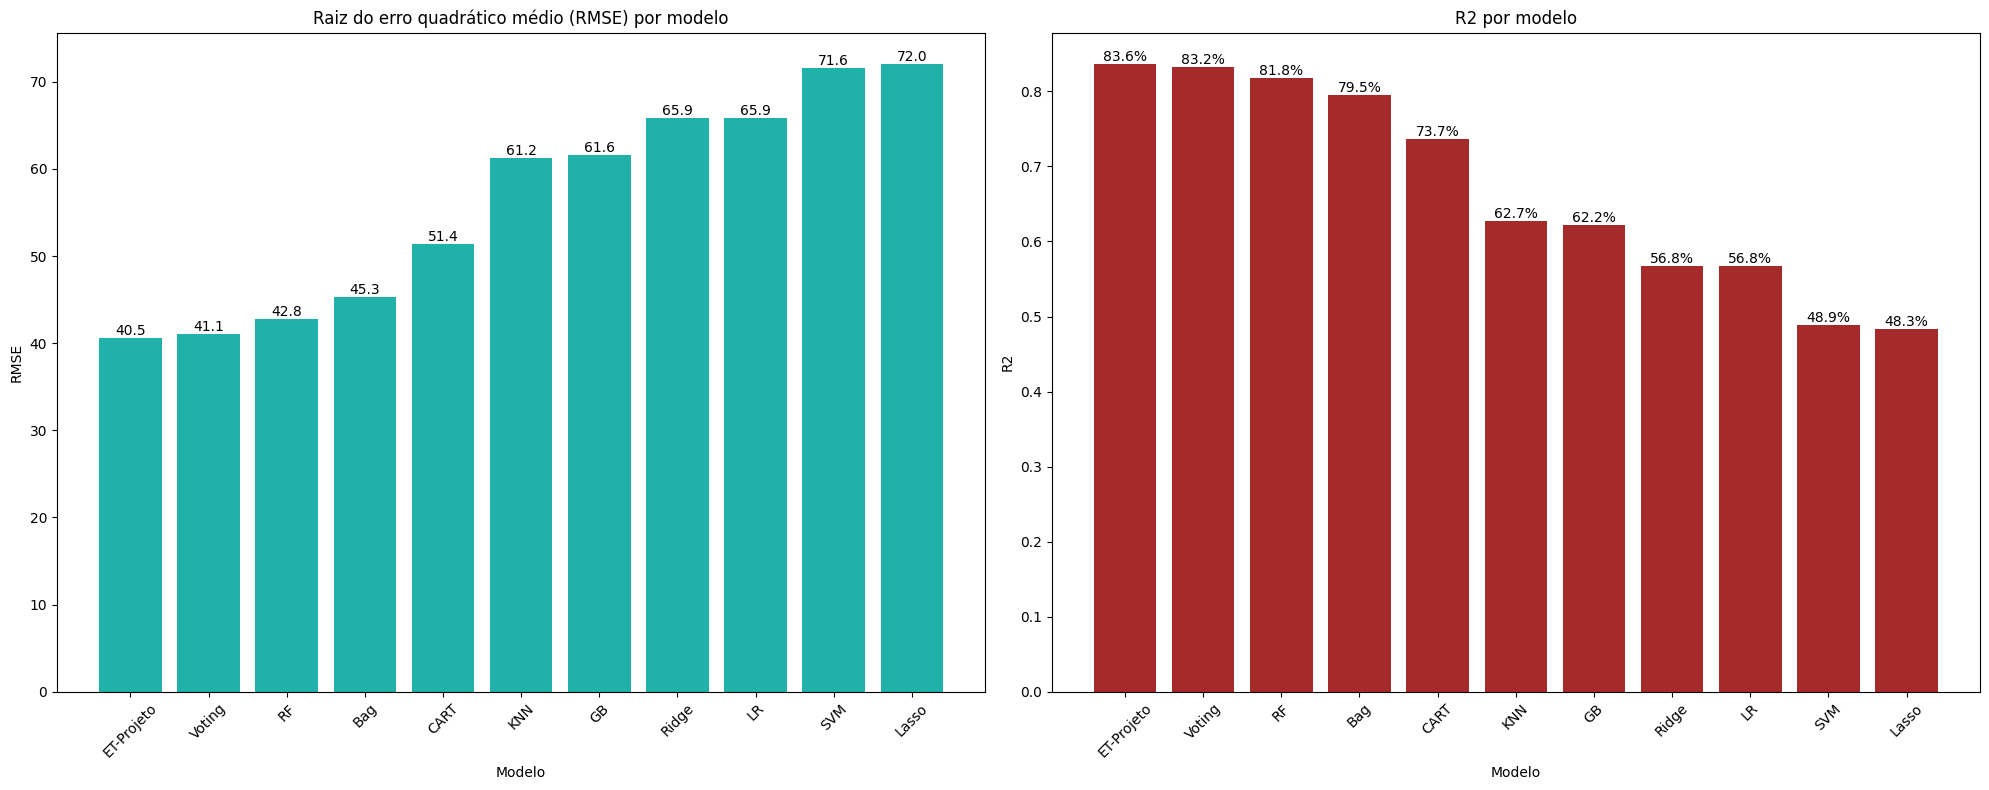

In [ ]:
# Preparando os modelos
models = [
    ('ET-Projeto', ExtraTreesRegressor(n_estimators=200, max_features=0.3)),
    ('LR', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('KNN', KNeighborsRegressor()),
    ('CART', DecisionTreeRegressor()),
    ('SVM', SVR()),
    ('Bag', BaggingRegressor()),
    ('RF', RandomForestRegressor()),
    ('GB', GradientBoostingRegressor()),
    ('Voting', VotingRegressor(estimators=[('extra_trees', ExtraTreesRegressor()), ('random_forest', RandomForestRegressor()), ('bagging', BaggingRegressor())]))
]

# Estimando o resultado do teste
scaler = MinMaxScaler().fit(x_train)
rescaledX = scaler.transform(x_train)
rescaledTestX = scaler.transform(x_test)

# Calculo das métricas de avaliação
results = []
for name, model in models:
    model.fit(rescaledX, y_train)
    predictions = model.predict(rescaledTestX)
    r2 = r2_score(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    y_mean = df_pp_FS['Price'].mean()
    si = (rmse / y_mean) * 100
    results.append((name, r2, rmse, y_mean, si))

# Print das métricas de avaliação
for name, r2, rmse, y_mean, si in results:
    msg = "%s: R2=%.2f%%, RMSE=%.2f, Y_mean=%.2f, SI=%.2f%%" % (name, r2 * 100, rmse, y_mean, si)
    print(msg)

########### PLOT

# Converter o RMSE e R2 do resultado dos modelos em um Data Frame ordenado
final_models = pd.DataFrame(results, columns=['Model', 'R2', 'RMSE', 'Col3', 'Col4'])
final_models_RMSE = final_models[['Model', 'RMSE']].sort_values(by='RMSE', ascending=True)
final_models_R2 = final_models[['Model', 'R2']].sort_values(by='R2', ascending=False)

# Criar figura para dois plots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Primeiro subplot - RMSE
axs[0].bar(final_models_RMSE['Model'], final_models_RMSE['RMSE'], color='lightseagreen')
# Titulos
axs[0].set_xlabel('Modelo')
axs[0].set_ylabel('RMSE')
axs[0].set_title('Raiz do erro quadrático médio (RMSE) por modelo')
# Labels
for i, value in enumerate(final_models_RMSE['RMSE']):
    axs[0].text(i, value, str(round(value, 1)), ha='center', va='bottom')
axs[0].set_xticklabels(final_models_RMSE['Model'], rotation=45)

# Segundo subplot - R2
axs[1].bar(final_models_R2['Model'], final_models_R2['R2'], color='brown')
# Titulos
axs[1].set_xlabel('Modelo')
axs[1].set_ylabel('R2')
axs[1].set_title('R2 por modelo')
# Labels
for i, value in enumerate(final_models_R2['R2']):
    axs[1].text(i, value, str(round(value*100, 1)) + "%", ha='center', va='bottom')
axs[1].set_xticklabels(final_models_R2['Model'], rotation=45)

# Ajuste de espaçamento
plt.tight_layout()

# Plot
plt.show()


Ao comparar o modelo ajustado no projeto com diversos outros modelos, percebe-se que o este possui tanto o maior R2 quanto o menor RMSE, sendo claramente a melhor escolha. Com RMSE de $40 e R2 de 84% traz-se confiaça para que o modelo gere boas previsões para novas entradas de dados.

O modelo desenvolvido no projeto é capaz de explicar 84% (R2) do valor da variável target, com raiz do erro quadrático médio que representa apenas 18.76% da média da variável target (RSME/y_media = 40.5/216.2 = 18.76%).

___________________________________________________________________________________________________________________________________________________________



**B) Deep Learning: Problema de Visão Computacional**

> 1) Definição do problema

Nesta segunda parte será analisado um Modelo de Deep Learning para Visão Computacional.

O dataset analisado é composto por uma amostra de 4.600 exames de imagem de cérebros classificados como saudáveis ou com presença de tumor cerebral.

Portanto, nesta etapa há um problema de Visão Computacional que consiste na classificação de exames entre saudável ou tumor.

> 2) Preparação de Dados

In [76]:
# Importar bibliotecas
import pandas as pd
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization, Normalization
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns

In [2]:
# sementes para reprodutividade
seed = 7
tf.random.set_seed(seed)

random.seed(seed)
np.random.seed(seed)

In [3]:
# Criar Dataframe com coluna da imagem e variável com marcação de tumor
bt = pd.DataFrame(columns=['image', 'tumor'])

# Função para download da imagem do url e carrega-la com PIL
def download_and_open_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

# URL para as imagens no github: "healthy" e "tumor"
healthy_urls = [
    'https://api.github.com/repos/lucasabbade93/Data_science/contents/images%20MVP2/Healthy_1',
    'https://api.github.com/repos/lucasabbade93/Data_science/contents/images%20MVP2/Healthy_2',
    'https://api.github.com/repos/lucasabbade93/Data_science/contents/images%20MVP2/Healthy_3',
]

tumor_urls = [
    'https://api.github.com/repos/lucasabbade93/Data_science/contents/images%20MVP2/Brain%20Tumor_1',
    'https://api.github.com/repos/lucasabbade93/Data_science/contents/images%20MVP2/Brain%20Tumor_2',
    'https://api.github.com/repos/lucasabbade93/Data_science/contents/images%20MVP2/Brain%20Tumor_3',
]


# Importar imagens "healthy" e marcar como 0
for url in healthy_urls:
    response = requests.get(url)
    data = response.json()
    for item in data:
        if item['type'] == 'file' and item['name'].lower().endswith((".jpg", ".jpeg", ".tif", ".png")):
            img_url = item['download_url']
            tumor = 0
            img = download_and_open_image(img_url)
            bt = bt.append({'image': img, 'tumor': tumor}, ignore_index=True)

# Importar imagens "tumor" e marcar como 1
for url in tumor_urls:
    response = requests.get(url)
    data = response.json()
    for item in data:
        if item['type'] == 'file' and item['name'].lower().endswith((".jpg", ".jpeg", ".tif", ".png")):
            img_url = item['download_url']
            tumor = 1
            img = download_and_open_image(img_url)
            bt = bt.append({'image': img, 'tumor': tumor}, ignore_index=True)


Nesta primeira parte da preparação de dados foi criado o dataframe no qual serão compiladas as imagens. O dataframe consiste em duas colunas, uma com as imagens ('image') e outra com a marcação da presença de tumor ('tumor').

Em seguida, foi criada uma função para download e carga da imagem a partir da url que contém os dados e definiu-se as urls que contém as imagens saudáveis (healthy_urls) e as imagens com tumor (tumor_urls).

Por fim, foram criados dois *loops* nos quais são inseridas cada uma das imagens no dataframe.Primeiro as imagens saudáveis, marcando-as com tumor=0 na variável de saída e depois as imagens com tumor, com a marcação tumor=1.

In [4]:
# mostrar o dataframe
bt

,image,tumor
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
2,<PIL.PngImagePlugin.PngImageFile image mode=RG...,0
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
...,...,...
4595,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1
4596,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1
4597,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1
4598,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1


Observamos o dataset para verificar se a importação ocorreu de forma correta. Percebe-se que as imagens foram importadas utilizando a biblioteca PIL para leitura de imagens e estão devidamente codificadas. A variável de saída está definida corretamente, sendo categórica (1=tumor; 0=saudável). Todas as 4.600 imagens foram importadas.

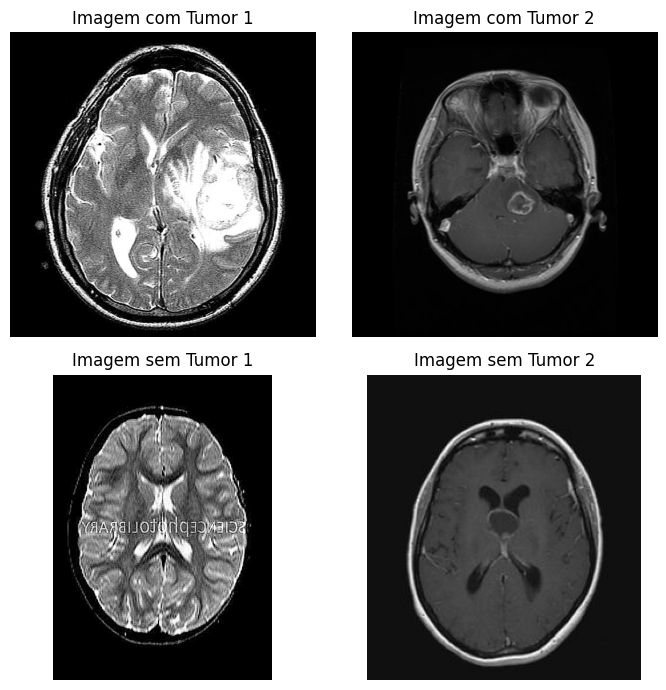

In [5]:
# Plotar imagens para verificar se carregou corretamente

# Criar um plot 2x2 para as imagens
plt.figure(figsize=(7, 7))

# Plotar a primeira imagem com tumor == 1
plt.subplot(2, 2, 1)
plt.imshow(bt[bt['tumor'] == 1]['image'].iloc[random.randint(0, len(bt[bt['tumor'] == 1]) - 1)])
plt.title('Imagem com Tumor 1')
plt.axis('off')

# Plotar a segunda imagem com tumor == 1
plt.subplot(2, 2, 2)
plt.imshow(bt[bt['tumor'] == 1]['image'].iloc[random.randint(0, len(bt[bt['tumor'] == 1]) - 1)])
plt.title('Imagem com Tumor 2')
plt.axis('off')

# Plotar a primeira imagem com tumor == 0
plt.subplot(2, 2, 3)
plt.imshow(bt[bt['tumor'] == 0]['image'].iloc[random.randint(0, len(bt[bt['tumor'] == 0]) - 1)])
plt.title('Imagem sem Tumor 1')
plt.axis('off')

# Plotar a segunda imagem com tumor == 0
plt.subplot(2, 2, 4)
plt.imshow(bt[bt['tumor'] == 0]['image'].iloc[random.randint(0, len(bt[bt['tumor'] == 0]) - 1)])
plt.title('Imagem sem Tumor 2')
plt.axis('off')

plt.tight_layout()
plt.show()



Realiza-se a leitura de algumas imagens para verificar se foram convertidas de forma correta.

In [6]:
# Distribuição de imagens por tumor (1=sim; 0=não)

# Contar o número de ocorrências de cada valor na coluna 'tumor'
tumor_counts = bt['tumor'].value_counts()

# Criar um DataFrame a partir dos valores contados
df_tumor_counts = pd.DataFrame({'tumor': tumor_counts.index, 'counts': tumor_counts.values})

# Adicionar uma nova coluna com a porcentagem
total_samples = len(bt)
df_tumor_counts['percent'] = (df_tumor_counts['counts'] / total_samples) * 100
df_tumor_counts['percent'] = df_tumor_counts['percent'].round(0).map('{:.0f}%'.format)

df_tumor_counts

,tumor,counts,percent
0,1,2513,55%
1,0,2087,45%


Verifica-se a distribuição da variável de saída. 45% das imagens são de cérebros saudáveis e 55% são de cérebros com tumor.

In [7]:

# Definir a Converter as imagens PIL em matrizes NumPy e redimensioná-las para o tamanho desejado (150x150x3)
largura_imagem, altura_imagem = 150, 150
X = np.array([np.array(img.convert('RGB').resize((largura_imagem, altura_imagem))) for img in bt['image']]).astype('int32')

# Definir a variável de saída e converter para o formato inteiro
y = bt['tumor'].astype('int32')

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Criar um ImageDataGenerator para normalização dos dados
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Criar geradores para os conjuntos de treino e teste
batch_size = 32
train_generator = datagen.flow(X_train, y_train, batch_size=batch_size)
test_generator = datagen.flow(X_test, y_test, batch_size=batch_size)



Primeiramente, são definidas as dimensões para as imagens de entrada (150x150 pixels e 3 canais de cores RGB), para que todas estejam no mesmo padrão. Em seguida, as imagens são convertidas do formato PIL para matrizes e redimensionadas para o tamanho especificado.

A variável de saída, que contém os rótulos referentes à presença ou ausência de tumores, é extraída do DataFrame e convertida para o formato inteiro.

Em seguida, os dados são divididos em conjuntos de treino e teste. A divisão é feita de forma que 20% dos dados são reservados para teste, e o parâmetro 'random_state' é definido para garantir a reprodutibilidade dos resultados.

Para normalizar os dados de entrada (os valores dos pixels), é criado um objeto 'ImageDataGenerator', que irá realizar a normalização dividindo cada valor do pixel por 255.0. É importante ressaltar que esta normalização é feita após a divisão entre treino e teste, para evitar o data leakage.

Por fim, são criados geradores de dados para os conjuntos de treino e teste usando as imagens normalizadas. Com o uso destes geradores os dados são carregados em lotes, ao invés de carregar todos os dados na memória de uma vez, o que é melhora para grandes conjuntos de dados.

A validação cruzada não foi utilizada devido à complexidade computacional e à presença de técnicas de aumento de dados e transfer learning, que fornecem validação implícita durante o treinamento e ajudam na generalização do modelo, tornando-a menos necessária para conjuntos de dados grandes.

> 3) Modelagem e treinamento

In [8]:

input_shape = (150,150,3)

# Modelo CNN simples
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Modelo LeNet
model_lenet = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(16, (5, 5), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_lenet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Modelo CNN com mais filtros na primeira camada densa e menor dropout
model_cnn_2 = Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512,activation="relu"),
    Dropout(0.2),
    Dense(1,activation="sigmoid")])

model_cnn_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Neste problema de classificação binária com imagens, foram testados três modelos diferentes: Um Modelo CNN Simples, Modelo LeNet e Modelo CNN com mais filtros na primeira camada densa e menor dropout.

O primeiro modelo testado é um modelo CNN simples, que consiste em uma arquitetura básica de rede neural convolucional. Constitui-se em três camadas convolucionais de tamanho 3x3 com numero de neurônios crescente (32, 64 e 128), cada uma seguida por uma camada de pooling para redução de dimensionalidade. Isso permite que a rede aprenda filtros de características relevantes em diferentes escalas espaciais nas imagens. Em seguida, a saída é achatada e conectada a uma camada densa de 128 neurônios com ativação ReLU, seguida por uma camada de dropout para evitar overfitting. A camada de saída tem apenas um neurônio com função de ativação sigmoide para classificar as imagens como tumor (1) ou não tumor (0). A camada final com 1 neurônio e função sigmoid são parâmetros ideais para problemas de classificação binários. O modelo é compilado com otimizador Adam e a função de perda utilizada é a binary_crossentropy, ambos também adequados para problemas de classificação binária. A métrica de avaliação utilizada é a acurácia. Sendo assim, estes parâmetros da última camada densa, otimizador e função perda serão os mesmos em todos os modelos testados neste projeto.

O Modelo CNN Simples é uma escolha razoável para começar a abordar problemas de classificação de imagens, especialmente quando o conjunto de dados não é extremamente grande ou complexo. Ele possui uma arquitetura básica, mas ainda pode ser eficaz em tarefas de classificação binária, capturando padrões relevantes nas imagens.



Em seguida foi testado um modelo LeNet modificado para classificação binária de imagens. O modelo LeNet é uma das arquiteturas pioneiras de redes neurais convolucionais, desenvolvido para reconhecimento de dígitos escritos à mão. Neste caso, o modelo é adaptado para o problema de classificação binária de tumores. Ele possui duas camadas convolucionais, de 6 e 16 neurônios em sequência, ambas com tamanho 5x5, cada uma seguida por uma camada de pooling, e em seguida, as saídas são achatadas. A rede possui três camadas densas com ativação ReLU, e numero de neurônios decrescentes (120, 84 e 1).

O Modelo LeNet é uma opção adequada quando o conjunto de dados é relativamente simples e a tarefa de classificação é mais direta, o que pode ser o caso para a classificação de tumores. Além disso, ele tem uma arquitetura leve e rápida para treinar, o que pode ser útil para prototipar soluções rapidamente.



Por fim, o ultimo modelo testado (CNN 2) apresenta uma arquitetura é semelhante ao Modelo CNN Simples, porém, a primeira camada densa possui mais neurônios (512). Além disso, a camada de dropout tem uma taxa menor (0.2) em comparação com o Modelo CNN Simples (0.5). Aumentar o número de neurônios na camada densa pode permitir ao modelo aprender representações mais complexas das características extraídas pelas camadas convolucionais, enquanto a redução da taxa de dropout pode permitir que mais informações sejam mantidas durante o treinamento, evitando a perda excessiva de informações importantes.

É importante destacar que neste projeto não foram exploradas arquiteturas mais avançadas, como ResNet, Inception ou VGG, uma vez que estas demandam poder computacional além do disponível e serem mais complexas do que o problema em questão necessita.

Abaixo serão treinados os três modelos utilizando os generators e em 10 épocas para fornecer tempo adequado para o treinamento.

In [9]:
# CNN: Treinar o modelo usando geradores de dados
epochs = 10

history_cnn = model_cnn.fit(train_generator, epochs=epochs, validation_data=test_generator)


Epoch 1/10
115/115 [==============================] - 23s 191ms/step - loss: 0.5376 - accuracy: 0.7383 - val_loss: 0.3571 - val_accuracy: 0.8250
Epoch 2/10
115/115 [==============================] - 21s 185ms/step - loss: 0.3429 - accuracy: 0.8514 - val_loss: 0.2829 - val_accuracy: 0.8641
Epoch 3/10
115/115 [==============================] - 21s 182ms/step - loss: 0.2371 - accuracy: 0.9014 - val_loss: 0.1785 - val_accuracy: 0.9239
Epoch 4/10
115/115 [==============================] - 21s 183ms/step - loss: 0.1623 - accuracy: 0.9413 - val_loss: 0.1598 - val_accuracy: 0.9413
Epoch 5/10
115/115 [==============================] - 21s 181ms/step - loss: 0.0935 - accuracy: 0.9679 - val_loss: 0.0934 - val_accuracy: 0.9728
Epoch 6/10
115/115 [==============================] - 21s 182ms/step - loss: 0.0631 - accuracy: 0.9804 - val_loss: 0.0857 - val_accuracy: 0.9717
Epoch 7/10
115/115 [==============================] - 21s 181ms/step - loss: 0.0547 - accuracy: 0.9823 - val_loss: 0.0689 - val_ac

In [10]:
# LeNet: Treinar o modelo usando geradores de dados
epochs = 10

history_lenet = model_lenet.fit(train_generator, epochs=epochs, validation_data=test_generator)

Epoch 1/10
115/115 [==============================] - 10s 83ms/step - loss: 0.4037 - accuracy: 0.8095 - val_loss: 0.2189 - val_accuracy: 0.9152
Epoch 2/10
115/115 [==============================] - 9s 80ms/step - loss: 0.1523 - accuracy: 0.9459 - val_loss: 0.1228 - val_accuracy: 0.9478
Epoch 3/10
115/115 [==============================] - 9s 80ms/step - loss: 0.0605 - accuracy: 0.9821 - val_loss: 0.1523 - val_accuracy: 0.9457
Epoch 4/10
115/115 [==============================] - 9s 80ms/step - loss: 0.0275 - accuracy: 0.9927 - val_loss: 0.1756 - val_accuracy: 0.9565
Epoch 5/10
115/115 [==============================] - 9s 80ms/step - loss: 0.0181 - accuracy: 0.9946 - val_loss: 0.0832 - val_accuracy: 0.9717
Epoch 6/10
115/115 [==============================] - 9s 80ms/step - loss: 0.0037 - accuracy: 0.9997 - val_loss: 0.0935 - val_accuracy: 0.9707
Epoch 7/10
115/115 [==============================] - 9s 81ms/step - loss: 4.3627e-04 - accuracy: 1.0000 - val_loss: 0.1139 - val_accuracy: 0

In [11]:
# CNN_2: Treinar o modelo usando geradores de dados
epochs = 10

history_cnn_2 = model_cnn_2.fit(train_generator, epochs=epochs, validation_data=test_generator)

Epoch 1/10
115/115 [==============================] - 26s 218ms/step - loss: 0.5611 - accuracy: 0.7410 - val_loss: 0.3385 - val_accuracy: 0.8674
Epoch 2/10
115/115 [==============================] - 25s 216ms/step - loss: 0.3195 - accuracy: 0.8614 - val_loss: 0.2368 - val_accuracy: 0.9000
Epoch 3/10
115/115 [==============================] - 25s 220ms/step - loss: 0.1726 - accuracy: 0.9372 - val_loss: 0.1787 - val_accuracy: 0.9435
Epoch 4/10
115/115 [==============================] - 26s 223ms/step - loss: 0.1013 - accuracy: 0.9668 - val_loss: 0.1156 - val_accuracy: 0.9630
Epoch 5/10
115/115 [==============================] - 25s 218ms/step - loss: 0.0542 - accuracy: 0.9818 - val_loss: 0.0947 - val_accuracy: 0.9663
Epoch 6/10
115/115 [==============================] - 25s 215ms/step - loss: 0.0434 - accuracy: 0.9853 - val_loss: 0.1399 - val_accuracy: 0.9554
Epoch 7/10
115/115 [==============================] - 25s 216ms/step - loss: 0.0349 - accuracy: 0.9875 - val_loss: 0.1027 - val_ac

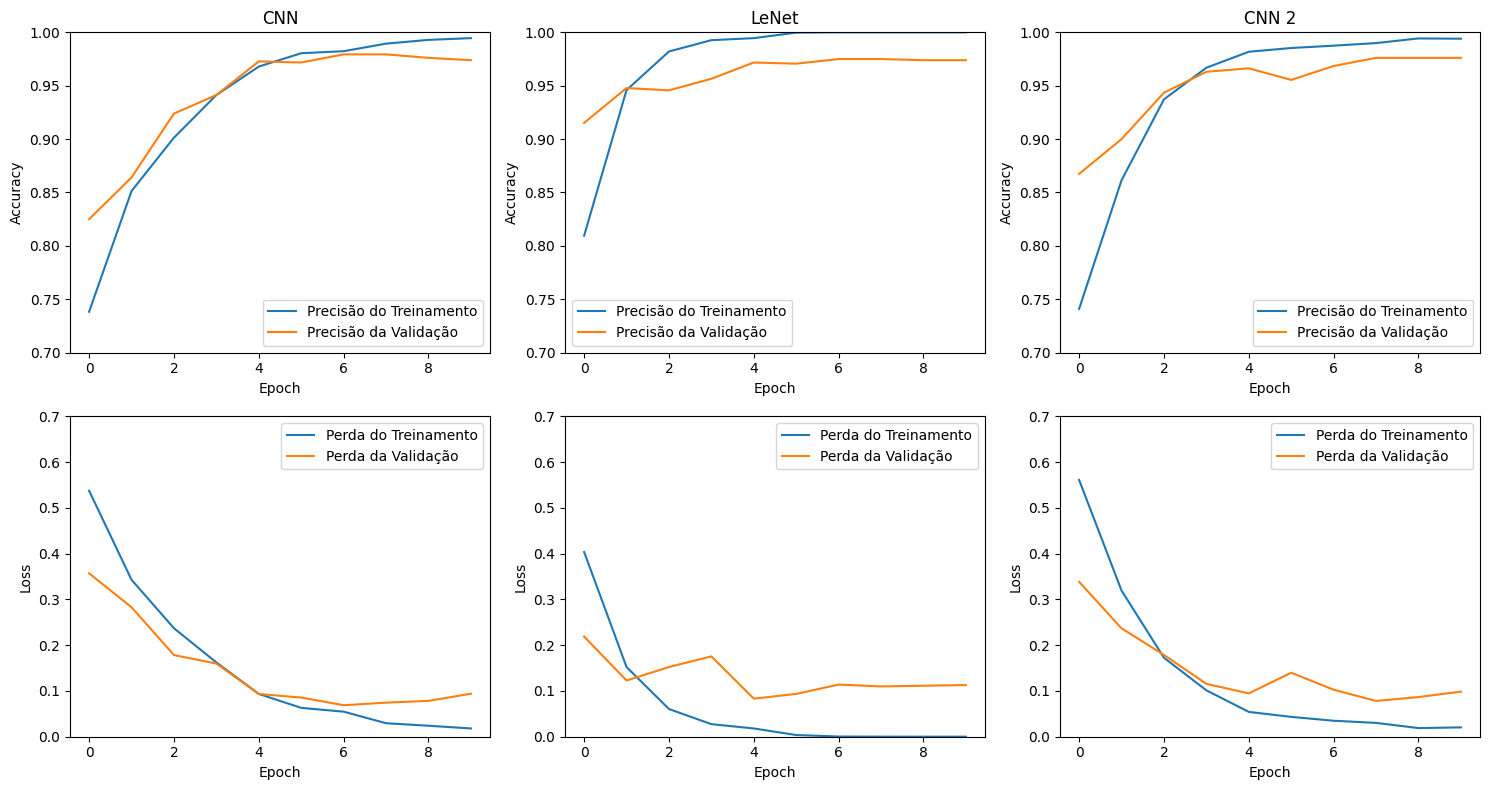

In [52]:
# Criar uma figura
plt.figure(figsize=(15, 8))

# Plotar a precisão do treinamento e validação para a CNN
plt.subplot(2, 3, 1)
plt.plot(history_cnn.history['accuracy'], label='Precisão do Treinamento')
plt.plot(history_cnn.history['val_accuracy'], label='Precisão da Validação')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN')
plt.ylim(0.7, 1)

# Plotar a perda do treinamento e validação para a CNN
plt.subplot(2, 3, 4)
plt.plot(history_cnn.history['loss'], label='Perda do Treinamento')
plt.plot(history_cnn.history['val_loss'], label='Perda da Validação')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0, 0.7)

# Plotar a precisão do treinamento e validação para a LeNet
plt.subplot(2, 3, 2)
plt.plot(history_lenet.history['accuracy'], label='Precisão do Treinamento')
plt.plot(history_lenet.history['val_accuracy'], label='Precisão da Validação')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('LeNet')
plt.ylim(0.7, 1)

# Plotar a perda do treinamento e validação para a LeNet
plt.subplot(2, 3, 5)
plt.plot(history_lenet.history['loss'], label='Perda do Treinamento')
plt.plot(history_lenet.history['val_loss'], label='Perda da Validação')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0, 0.7)

# Plotar a precisão do treinamento e validação para a CNN 2
plt.subplot(2, 3, 3)
plt.plot(history_cnn_2.history['accuracy'], label='Precisão do Treinamento')
plt.plot(history_cnn_2.history['val_accuracy'], label='Precisão da Validação')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN 2')
plt.ylim(0.7, 1)

# Plotar a perda do treinamento e validação para a CNN 2
plt.subplot(2, 3, 6)
plt.plot(history_cnn_2.history['loss'], label='Perda do Treinamento')
plt.plot(history_cnn_2.history['val_loss'], label='Perda da Validação')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0, 0.7)

# Ajustar o layout e mostrar os gráficos
plt.tight_layout()
plt.show()


Ao observar o histórico de treinamento dos três modelos percebe-se que todos obtiveram resultados satisfatórios, contudo ainda há epaço para melhorias e refinamentos.

Destaca-se que os modelos CNN e CNN 2 não obtiveram resultados tão bons para a base de treinamento quando o modelo LeNet. O modelo LeNet conseguiu identificar o padrão da base de treino em poucas épocas, chegando rapidamente a acurácia de 100% e perda proxima de zero. Contudo, este modelo teve uma grande disparidade entre as bases de treino e teste, indicando haver uma adatação muito grande à base de treino e não performar com o mesmo padrão em dados não vistos no treinnamento (overfitting). Ambos os modelos CNN obtiveram curvas de treino e validação bem proximas, com destaque especial para o CNN simples, talvez por apresentar um dropout maior, o que contribuiu para evitar o overfitting. Contudo, estes modelos aparentam ter estagnado o nível de aprendizado a partir da 7ª/8ª épocas, quando a perda da validação passa a aumentar. O melhor desempenho alcançado foi do modelo CNN simples na Epoch 7, com acurácia na base de teste de 97,93%.

Na sequência serão realizados algumas alterações nos modelos e ajustes nos hiperparâmetros através da combinação das estruturas dos modelos acima para alcançar melhores resultados.

In [13]:
input_shape = (150,150,3)

# Modelo LeNet 2

model_lenet_2 = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(16, (5, 5), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_lenet_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Como foi identificado que o modelo LeNet apresentou um maior overfitting, nesta etapa foi inserido um droupout de 0.5 antes da última camada densa para conter a aderência excessiva à base de treinamento.

Portanto, o modelo LeNet 2 apresenta as mesmas estruturas do modelo LeNet somente com a inclusão deste parâmetro. Abaixo o modelo será treinado novamente em 10 épocas.

In [14]:
# LeNet_2: Treinar o modelo usando geradores de dados
epochs = 10

history_lenet_2 = model_lenet_2.fit(train_generator, epochs=epochs, validation_data=test_generator)

Epoch 1/10
115/115 [==============================] - 11s 84ms/step - loss: 0.4840 - accuracy: 0.7563 - val_loss: 0.3373 - val_accuracy: 0.8641
Epoch 2/10
115/115 [==============================] - 9s 82ms/step - loss: 0.2505 - accuracy: 0.9022 - val_loss: 0.1711 - val_accuracy: 0.9467
Epoch 3/10
115/115 [==============================] - 9s 82ms/step - loss: 0.1153 - accuracy: 0.9625 - val_loss: 0.1111 - val_accuracy: 0.9565
Epoch 4/10
115/115 [==============================] - 10s 84ms/step - loss: 0.0516 - accuracy: 0.9842 - val_loss: 0.1194 - val_accuracy: 0.9565
Epoch 5/10
115/115 [==============================] - 9s 81ms/step - loss: 0.0227 - accuracy: 0.9937 - val_loss: 0.1295 - val_accuracy: 0.9652
Epoch 6/10
115/115 [==============================] - 9s 82ms/step - loss: 0.0111 - accuracy: 0.9978 - val_loss: 0.0972 - val_accuracy: 0.9761
Epoch 7/10
115/115 [==============================] - 9s 82ms/step - loss: 0.0081 - accuracy: 0.9986 - val_loss: 0.1250 - val_accuracy: 0.96

In [15]:
# Modelo CNN 3
model_cnn_3 = Sequential([
    Conv2D(16, (5, 5), activation='relu', padding="same", input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(32, (5, 5), activation='relu', padding="same"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_cnn_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Neste modelo (denominado CNN 3) foi utilizada a mesma arquitetura no LeNet 2 com algumas pequenas mudanças. Aumentaram-se os números de neurônios das duas camadas convolucionais (16 e 32), além de incluir o parâmetro padding="same" nas mesma, o que ajuda a preservar a resolução espacial da imagem após a convolução, permitindo que o modelo tenha melhor acurácia para imagens mais complexas. Ainda foi realizada uma alteração no número de neurônios das duas primeiras camadas densas (128 e 64).

Além disso, para evitar overfitting e salvar a melhor versão do modelo, foram utilizados os parâmetros EarlyStopping e ModelCheckpoint respectivamente.

Ao utilizar EarlyStopping pode-se definir um número maior de épocas de modo que o modelo para sozinho a partir do momento em que ele não está apresentando melhoras no aprendizado. Na configuração abaixo, após 5 épocas sem que a validação da perda apresente valores abaixo do menor valor registrado, o modelo interrompe o seu treinamento.

É fundamental o uso conjunto da função ModelCheckpoint neste caso, pois ao parar o aprendizado do modelo, com ModelCheckpoint é possível remtomar a melhor versão do modelo em função da maior acurácia de validação, como foi definido abaixo.

In [16]:
# CNN 3: Treinar o modelo usando geradores de dados
epochs = 20

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", patience=5, restore_best_weights = True)

checkpoint = ModelCheckpoint("Model", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

history_cnn_3 = model_cnn_3.fit(train_generator,verbose=1, callbacks = [early_stopping, checkpoint], epochs=epochs, validation_data=test_generator)

Epoch 1/20
115/115 [==============================] - ETA: 0s - loss: 0.4525 - accuracy: 0.7848
Epoch 1: val_accuracy improved from -inf to 0.87500, saving model to Model


115/115 [==============================] - 22s 180ms/step - loss: 0.4525 - accuracy: 0.7848 - val_loss: 0.3357 - val_accuracy: 0.8750
Epoch 2/20
115/115 [==============================] - ETA: 0s - loss: 0.1962 - accuracy: 0.9323
Epoch 2: val_accuracy improved from 0.87500 to 0.93804, saving model to Model


115/115 [==============================] - 20s 178ms/step - loss: 0.1962 - accuracy: 0.9323 - val_loss: 0.1659 - val_accuracy: 0.9380
Epoch 3/20
115/115 [==============================] - ETA: 0s - loss: 0.0918 - accuracy: 0.9742
Epoch 3: val_accuracy did not improve from 0.93804
115/115 [==============================] - 19s 169ms/step - loss: 0.0918 - accuracy: 0.9742 - val_loss: 0.1972 - val_accuracy: 0.9304
Epoch 4/20
115/115 [==============================] - ETA: 0s - loss: 0.0476 - accuracy: 0.9853
Epoch 4: val_accuracy improved from 0.93804 to 0.97500, saving model to Model


115/115 [==============================] - 20s 177ms/step - loss: 0.0476 - accuracy: 0.9853 - val_loss: 0.0943 - val_accuracy: 0.9750
Epoch 5/20
115/115 [==============================] - ETA: 0s - loss: 0.0406 - accuracy: 0.9870
Epoch 5: val_accuracy did not improve from 0.97500
115/115 [==============================] - 20s 171ms/step - loss: 0.0406 - accuracy: 0.9870 - val_loss: 0.0859 - val_accuracy: 0.9652
Epoch 6/20
115/115 [==============================] - ETA: 0s - loss: 0.0217 - accuracy: 0.9935
Epoch 6: val_accuracy improved from 0.97500 to 0.98043, saving model to Model


115/115 [==============================] - 21s 180ms/step - loss: 0.0217 - accuracy: 0.9935 - val_loss: 0.0646 - val_accuracy: 0.9804
Epoch 7/20
115/115 [==============================] - ETA: 0s - loss: 0.0174 - accuracy: 0.9948
Epoch 7: val_accuracy did not improve from 0.98043
115/115 [==============================] - 20s 170ms/step - loss: 0.0174 - accuracy: 0.9948 - val_loss: 0.0897 - val_accuracy: 0.9793
Epoch 8/20
115/115 [==============================] - ETA: 0s - loss: 0.0158 - accuracy: 0.9954
Epoch 8: val_accuracy did not improve from 0.98043
115/115 [==============================] - 20s 170ms/step - loss: 0.0158 - accuracy: 0.9954 - val_loss: 0.1382 - val_accuracy: 0.9641
Epoch 9/20
115/115 [==============================] - ETA: 0s - loss: 0.0242 - accuracy: 0.9921
Epoch 9: val_accuracy did not improve from 0.98043
115/115 [==============================] - 20s 170ms/step - loss: 0.0242 - accuracy: 0.9921 - val_loss: 0.1390 - val_accuracy: 0.9576
Epoch 10/20
115/115 [==

In [22]:
# Modelo CNN 4
model_cnn_4 = Sequential([
    Conv2D(16, (5, 5), activation='relu', padding="same", input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(32, (5, 5), activation='relu', padding="same"),
    MaxPooling2D((2, 2)),
    Conv2D(64, (5, 5), activation='relu', padding="same"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (5, 5), activation='relu', padding="same"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_cnn_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Por fim, foi construído o modelo CNN 4, que apresenta a mesma estrutura do modelo CNN 3 com a inclusão de outras duas camadas de convolução de 64 e 128 neurônios, seguidas novamente por outras duas camadas de pooling. Nesta arquitetura mais complexa em termos de camadas convolucionais (4 camadas), a condição padding="same" ainda se faz mais útil na preservação da resolução da imagem no treinamento do modelo.

Foram utlizadas novamente as funções EarlyStopping e ModelCheckpoint para otimizar o número de épocas e salvar a melhor versão do modelo.

In [23]:
# CNN 4: Treinar o modelo usando geradores de dados
epochs = 20

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", patience=5, restore_best_weights = True)

checkpoint = ModelCheckpoint("Model.4", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

history_cnn_4 = model_cnn_4.fit(train_generator,verbose=1, callbacks = [early_stopping, checkpoint], epochs=epochs, validation_data=test_generator)

Epoch 1/20
115/115 [==============================] - ETA: 0s - loss: 0.5818 - accuracy: 0.6864
Epoch 1: val_accuracy improved from -inf to 0.81957, saving model to Model.4


115/115 [==============================] - 27s 225ms/step - loss: 0.5818 - accuracy: 0.6864 - val_loss: 0.4587 - val_accuracy: 0.8196
Epoch 2/20
115/115 [==============================] - ETA: 0s - loss: 0.3894 - accuracy: 0.8361
Epoch 2: val_accuracy improved from 0.81957 to 0.89565, saving model to Model.4


115/115 [==============================] - 26s 226ms/step - loss: 0.3894 - accuracy: 0.8361 - val_loss: 0.2629 - val_accuracy: 0.8957
Epoch 3/20
115/115 [==============================] - ETA: 0s - loss: 0.2539 - accuracy: 0.9084
Epoch 3: val_accuracy improved from 0.89565 to 0.91848, saving model to Model.4


115/115 [==============================] - 25s 222ms/step - loss: 0.2539 - accuracy: 0.9084 - val_loss: 0.1989 - val_accuracy: 0.9185
Epoch 4/20
115/115 [==============================] - ETA: 0s - loss: 0.1399 - accuracy: 0.9584
Epoch 4: val_accuracy improved from 0.91848 to 0.96739, saving model to Model.4


115/115 [==============================] - 26s 224ms/step - loss: 0.1399 - accuracy: 0.9584 - val_loss: 0.1115 - val_accuracy: 0.9674
Epoch 5/20
115/115 [==============================] - ETA: 0s - loss: 0.0742 - accuracy: 0.9742
Epoch 5: val_accuracy improved from 0.96739 to 0.97500, saving model to Model.4


115/115 [==============================] - 26s 222ms/step - loss: 0.0742 - accuracy: 0.9742 - val_loss: 0.0861 - val_accuracy: 0.9750
Epoch 6/20
115/115 [==============================] - ETA: 0s - loss: 0.0558 - accuracy: 0.9818
Epoch 6: val_accuracy did not improve from 0.97500
115/115 [==============================] - 24s 210ms/step - loss: 0.0558 - accuracy: 0.9818 - val_loss: 0.1027 - val_accuracy: 0.9576
Epoch 7/20
115/115 [==============================] - ETA: 0s - loss: 0.0291 - accuracy: 0.9918
Epoch 7: val_accuracy did not improve from 0.97500
115/115 [==============================] - 24s 209ms/step - loss: 0.0291 - accuracy: 0.9918 - val_loss: 0.1588 - val_accuracy: 0.9522
Epoch 8/20
115/115 [==============================] - ETA: 0s - loss: 0.0267 - accuracy: 0.9916
Epoch 8: val_accuracy improved from 0.97500 to 0.97717, saving model to Model.4


115/115 [==============================] - 26s 225ms/step - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.0787 - val_accuracy: 0.9772
Epoch 9/20
115/115 [==============================] - ETA: 0s - loss: 0.0158 - accuracy: 0.9946
Epoch 9: val_accuracy did not improve from 0.97717
115/115 [==============================] - 24s 210ms/step - loss: 0.0158 - accuracy: 0.9946 - val_loss: 0.1303 - val_accuracy: 0.9630
Epoch 10/20
115/115 [==============================] - ETA: 0s - loss: 0.0274 - accuracy: 0.9894
Epoch 10: val_accuracy did not improve from 0.97717
115/115 [==============================] - 24s 208ms/step - loss: 0.0274 - accuracy: 0.9894 - val_loss: 0.1134 - val_accuracy: 0.9739
Epoch 11/20
115/115 [==============================] - ETA: 0s - loss: 0.0342 - accuracy: 0.9886
Epoch 11: val_accuracy improved from 0.97717 to 0.97935, saving model to Model.4


115/115 [==============================] - 26s 222ms/step - loss: 0.0342 - accuracy: 0.9886 - val_loss: 0.1018 - val_accuracy: 0.9793
Epoch 12/20
115/115 [==============================] - ETA: 0s - loss: 0.0211 - accuracy: 0.9921
Epoch 12: val_accuracy improved from 0.97935 to 0.98587, saving model to Model.4


115/115 [==============================] - 25s 221ms/step - loss: 0.0211 - accuracy: 0.9921 - val_loss: 0.0760 - val_accuracy: 0.9859
Epoch 13/20
115/115 [==============================] - ETA: 0s - loss: 0.0107 - accuracy: 0.9973
Epoch 13: val_accuracy improved from 0.98587 to 0.98913, saving model to Model.4


115/115 [==============================] - 26s 223ms/step - loss: 0.0107 - accuracy: 0.9973 - val_loss: 0.0434 - val_accuracy: 0.9891
Epoch 14/20
115/115 [==============================] - ETA: 0s - loss: 0.0037 - accuracy: 0.9992
Epoch 14: val_accuracy improved from 0.98913 to 0.99022, saving model to Model.4


115/115 [==============================] - 25s 221ms/step - loss: 0.0037 - accuracy: 0.9992 - val_loss: 0.0610 - val_accuracy: 0.9902
Epoch 15/20
115/115 [==============================] - ETA: 0s - loss: 3.8459e-04 - accuracy: 1.0000
Epoch 15: val_accuracy did not improve from 0.99022
115/115 [==============================] - 24s 210ms/step - loss: 3.8459e-04 - accuracy: 1.0000 - val_loss: 0.0789 - val_accuracy: 0.9902
Epoch 16/20
115/115 [==============================] - ETA: 0s - loss: 0.0074 - accuracy: 0.9978
Epoch 16: val_accuracy did not improve from 0.99022
115/115 [==============================] - 24s 209ms/step - loss: 0.0074 - accuracy: 0.9978 - val_loss: 0.2326 - val_accuracy: 0.9489
Epoch 17/20
115/115 [==============================] - ETA: 0s - loss: 0.0385 - accuracy: 0.9859
Epoch 17: val_accuracy did not improve from 0.99022
115/115 [==============================] - 24s 209ms/step - loss: 0.0385 - accuracy: 0.9859 - val_loss: 0.1085 - val_accuracy: 0.9783
Epoch 18/

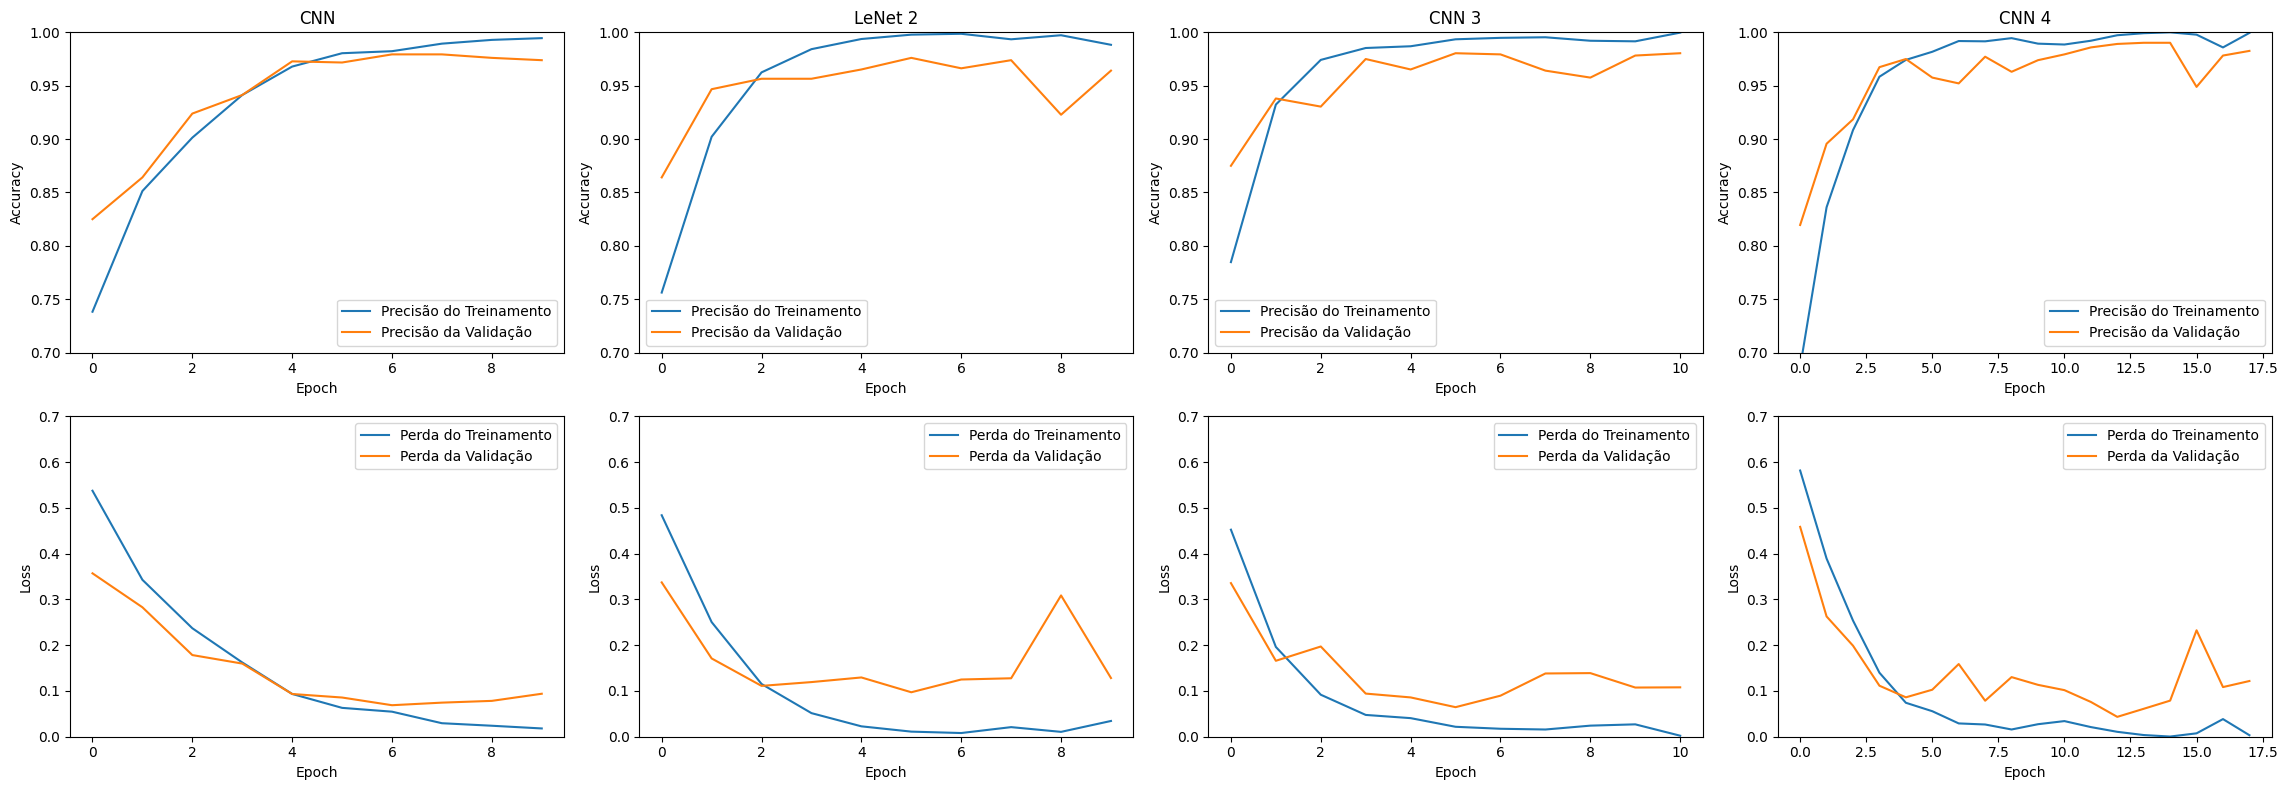

In [50]:
# Criar uma figura
plt.figure(figsize=(23, 8))

# Plotar a precisão do treinamento e validação para a CNN
plt.subplot(2, 4, 1)
plt.plot(history_cnn.history['accuracy'], label='Precisão do Treinamento')
plt.plot(history_cnn.history['val_accuracy'], label='Precisão da Validação')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN')
plt.ylim(0.7, 1)

# Plotar a perda do treinamento e validação para a CNN
plt.subplot(2, 4, 5)
plt.plot(history_cnn.history['loss'], label='Perda do Treinamento')
plt.plot(history_cnn.history['val_loss'], label='Perda da Validação')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0, 0.7)


# Plotar a precisão do treinamento e validação para a LeNet 2
plt.subplot(2, 4, 2)
plt.plot(history_lenet_2.history['accuracy'], label='Precisão do Treinamento')
plt.plot(history_lenet_2.history['val_accuracy'], label='Precisão da Validação')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('LeNet 2')
plt.ylim(0.7, 1)

# Plotar a perda do treinamento e validação para a LeNet 2
plt.subplot(2, 4, 6)
plt.plot(history_lenet_2.history['loss'], label='Perda do Treinamento')
plt.plot(history_lenet_2.history['val_loss'], label='Perda da Validação')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0, 0.7)

# Plotar a precisão do treinamento e validação para a CNN 3
plt.subplot(2, 4, 3)
plt.plot(history_cnn_3.history['accuracy'], label='Precisão do Treinamento')
plt.plot(history_cnn_3.history['val_accuracy'], label='Precisão da Validação')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN 3')
plt.ylim(0.7, 1)

# Plotar a perda do treinamento e validação para a CNN 3
plt.subplot(2, 4, 7)
plt.plot(history_cnn_3.history['loss'], label='Perda do Treinamento')
plt.plot(history_cnn_3.history['val_loss'], label='Perda da Validação')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0, 0.7)

# Plotar a precisão do treinamento e validação para a CNN 4
plt.subplot(2, 4, 4)
plt.plot(history_cnn_4.history['accuracy'], label='Precisão do Treinamento')
plt.plot(history_cnn_4.history['val_accuracy'], label='Precisão da Validação')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN 4')
plt.ylim(0.7, 1)

# Plotar a perda do treinamento e validação para a CNN 4
plt.subplot(2, 4, 8)
plt.plot(history_cnn_4.history['loss'], label='Perda do Treinamento')
plt.plot(history_cnn_4.history['val_loss'], label='Perda da Validação')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0, 0.7)

# Ajustar o layout e exibir os gráficos
plt.tight_layout()
plt.show()


Ao observar os resultados acima, pode-se perceber que os modelos CNN 3 e CNN 4 obtiveram melhores resultados que os demais. O modelo LeNet 2 não foi capaz de diminuir o gap entre treinamento e validação. Apesar do modelo CNN 3 apresentar um gap maior entre treino e teste do que o modelo CNN, os seus resultados tanto em acurácia do treinamento quanto em acurácia da validação são superiores, tornando-o um modelo melhor.

Contudo, o modelo CNN 4, até a época 15, obteve o menor gap entre treino e teste e maiores valores de acurácia (tanto treino quanto teste) dentre todos os modelos. Após esta época ele passa a apresentar indícios de overfitting e piora os seus resultados, o que deixa evidente a importância dos parâmetros EarlyStopping e ModelCheckpoint para chegar a um resultado ótimo. Sendo assim, é destacável as acurácias de 100% no treino e 99% no teste neste modelo na época 15.

Por fim, é relevante destacar que nenhum modelo apresentou problemas de underfitting, uma vez que todos tiveram acurácia superior a 99% nas bases de treinamento.

> 4) Avaliação de Resultados

29/29 [==============================] - 1s 36ms/step


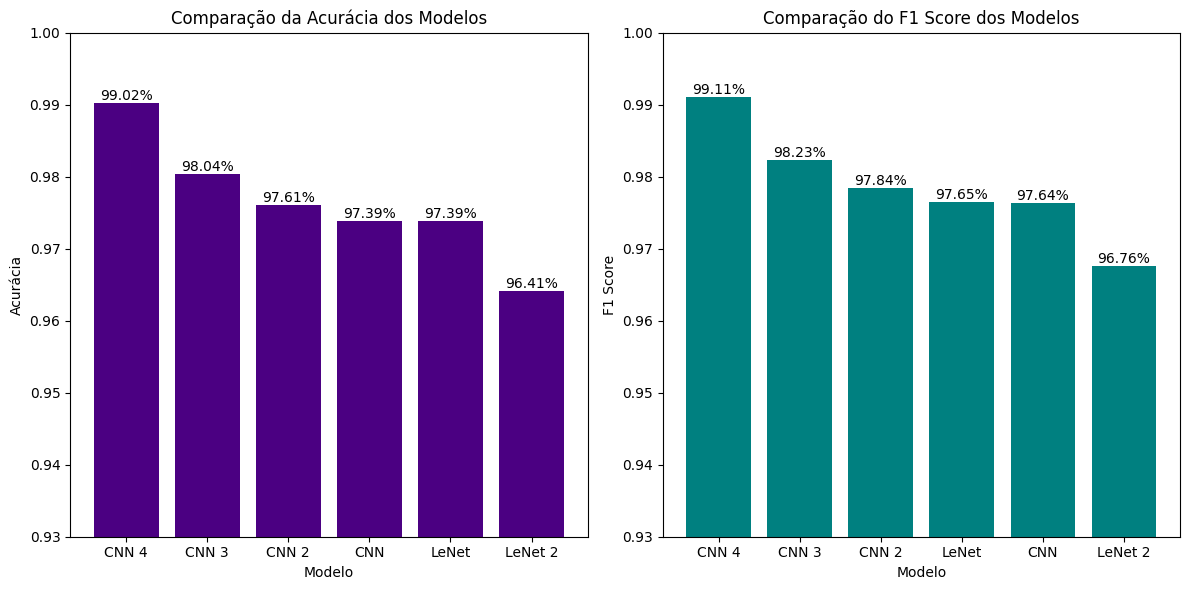

In [269]:
# Criar um novo gerador para avaliação usando o NumpyArrayIterator
eval_generator = datagen.flow(X_test, y_test, batch_size=batch_size, shuffle=False)

# Obter o número de etapas no gerador de avaliação
num_steps = len(eval_generator)

model_cnn_3_saved_model = load_model("Model")
model_cnn_4_saved_model = load_model("Model.4")

MODELS = [model_cnn, model_lenet, model_cnn_2, model_lenet_2, model_cnn_3_saved_model, model_cnn_4_saved_model]

# Definir os nomes dos modelos para serem usados na exibição
model_names = ["CNN", "LeNet", "CNN 2", "LeNet 2", "CNN 3", "CNN 4"]

# Listas para armazenar as acurácias e F1 Score de cada modelo
accuracies = []
f1_scores = []

for i, MODEL in enumerate(MODELS):
    # Avaliar o modelo nos dados de teste usando o gerador de avaliação
    test_loss, test_accuracy = MODEL.evaluate(eval_generator, steps=num_steps)

    # Fazer previsões nos dados de teste usando o gerador de avaliação
    y_pred_prob = MODEL.predict(eval_generator, steps=num_steps)

    # Como o modelo produz probabilidades para classificação binária, converter para previsões binárias (0 ou 1)
    y_pred_binary = (y_pred_prob > 0.5).astype(int).flatten()

    # Calcular o F1 Score usando y_test (rótulos verdadeiros) e y_pred_binary (rótulos previstos)
    f1 = f1_score(y_test, y_pred_binary)

    # Adicionar acurácia e F1 Score à lista correspondente
    accuracies.append(test_accuracy)
    f1_scores.append(f1)

# Figura do plot
plt.figure(figsize=(12, 6))

# Ordenar as listas de nomes dos modelos, acurácias e F1 Score em ordem decrescente de acurácia
sorted_indices_acc = sorted(range(len(accuracies)), key=lambda k: accuracies[k], reverse=True)
sorted_model_names_acc = [model_names[i] for i in sorted_indices_acc]
sorted_accuracies = [accuracies[i] for i in sorted_indices_acc]

# Plotar o gráfico de barras para acurácia em ordem decrescente
plt.subplot(1, 2, 1)
plt.bar(sorted_model_names_acc, sorted_accuracies, color='indigo')
plt.xlabel('Modelo')
plt.ylabel('Acurácia')
plt.title('Comparação da Acurácia dos Modelos')
plt.ylim(0.93, 1)

# Adicionar os nomes dos modelos no topo dos gráficos
for i, v in enumerate(sorted_accuracies):
    plt.text(i, v, str(round(v*100, 2)) + "%", ha='center', va='bottom')

# Ordenar as listas de nomes dos modelos, acurácias e F1 Score em ordem decrescente de F1 Score
sorted_indices_f1 = sorted(range(len(f1_scores)), key=lambda k: f1_scores[k], reverse=True)
sorted_model_names_f1 = [model_names[i] for i in sorted_indices_f1]
sorted_f1_scores = [f1_scores[i] for i in sorted_indices_f1]

# Plotar o gráfico de barras para F1 Score em ordem decrescente
plt.subplot(1, 2, 2)
plt.bar(sorted_model_names_f1, sorted_f1_scores, color='teal')
plt.xlabel('Modelo')
plt.ylabel('F1 Score')
plt.title('Comparação do F1 Score dos Modelos')
plt.ylim(0.93, 1)

# Adicionar os nomes dos modelos no topo dos gráficos
for i, v in enumerate(sorted_f1_scores):
    plt.text(i, v, str(round(v*100, 2)) + "%", ha='center', va='bottom')

plt.tight_layout()
plt.show()



Para avaliar o desempenho dos modelos foram escolhidas a Acurácia de validação e o score F1. Estas são métricas fundamentais para a avaliação de modelos e apresentam características complementares. A "val_accuracy" fornece uma medida geral do desempenho do modelo, avaliando sua capacidade de generalização para dados não vistos.

Por outro lado, a métrica F1 considera tanto a precisão quanto o recall, sendo especialmente relevante em problemas com classes desbalanceadas, garantindo que o modelo não apenas acerte a classe positiva, mas também evite falsos positivos na classe negativa. Ao utilizar essas métricas, buscamos um modelo que não apenas obtenha alto desempenho em geral, mas também lide adequadamente com a tarefa específica de classificação binária.

Como não foi utilizada validação cruzada no treinamento dos modelos, os mesmos já foram treinados com a utilização de toda a base de treinamnto. Portanto, foram comparados os seus resultados em cima de toda a base de teste.

Ao observar os resultados plotados acima, percebe-se que o modelo CNN 4 obteve um resultado muito superior tanto em Acurácia quanto no score F1, mostrando-se ser o modelo mais preciso e balanceado dentre todos. Além disso, como destacado anteriormente, este modelo apresenta resultados similares tanto nas bases de treino e de teste, o que indica a ausencia de overfitting, de modo que ele performa bem para imagens não vistas anteriormente. Sendo assim, o modelo CNN 4 será o escolhido.

29/29 [==============================] - 1s 31ms/step


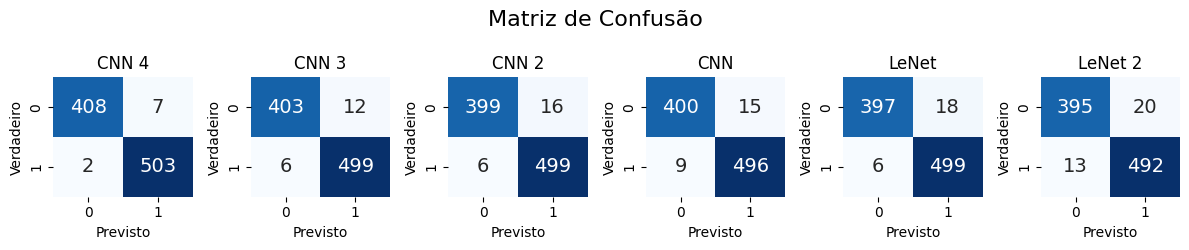

In [176]:
# Listas para armazenar as matrizes de confusão de cada modelo
confusion_matrices = []

for MODEL in MODELS:
    # Fazer previsões nos dados de teste usando o gerador de avaliação
    y_pred_prob = MODEL.predict(eval_generator, steps=num_steps)

    # Como o modelo produz probabilidades para classificação binária, converter para previsões binárias (0 ou 1)
    y_pred_binary = (y_pred_prob > 0.5).astype(int).flatten()

    # Calcular a matriz de confusão usando y_test (rótulos verdadeiros) e y_pred_binary (rótulos previstos)
    cm = confusion_matrix(y_test, y_pred_binary)
    confusion_matrices.append(cm)

# Figura do plot
plt.figure(figsize=(12, 2.5))

# Ordenar as listas de nomes dos modelos, matrizes de confusão, acurácias e F1 Score em ordem decrescente de acurácia
sorted_indices_acc = sorted(range(len(accuracies)), key=lambda k: accuracies[k], reverse=True)
sorted_model_names_acc = [model_names[i] for i in sorted_indices_acc]
sorted_accuracies = [accuracies[i] for i in sorted_indices_acc]
sorted_confusion_matrices = [confusion_matrices[i] for i in sorted_indices_acc]

# Adicionar os nomes dos modelos no topo dos gráficos
for i, v in enumerate(sorted_accuracies):
    plt.text(i, v, str(round(v*100, 1)) + "%", ha='center', va='bottom')

# Plotar as matrizes de confusão em uma matriz de subplots
for i, (model_name, cm) in enumerate(zip(sorted_model_names_acc, sorted_confusion_matrices)):
    plt.subplot(1, 6, i + 1)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={"size": 14})
    plt.xlabel('Previsto')
    plt.ylabel('Verdadeiro')
    plt.title(model_name)

plt.suptitle('Matriz de Confusão', fontsize=16)
plt.tight_layout()
plt.show()


Em seguida foram plotadas as Matrizes de Confusão de todos os modelos para identificar o número e o tipo de erros dos modelos na base de teste. Conforme o resultado anterior indicava, o modelo CNN 4 obteve o menor número de erros dentre todos, somente 9 imagens classificadas erroneamente dentre uma amostra de teste de 920 imagens.

É importante destacar 7 dos 9 erros foram de falso positivo, o que em termos de um problema médico indica menor impacto ao paciente.

A seguir serão plotadas as imagens classificadas de forma inadequada, juntamente com a probabilidade de haver tumor, de acordo com o modelo escolhido (CNN 4), para identificar se há algum problema com elas.

29/29 [==============================] - 1s 36ms/step


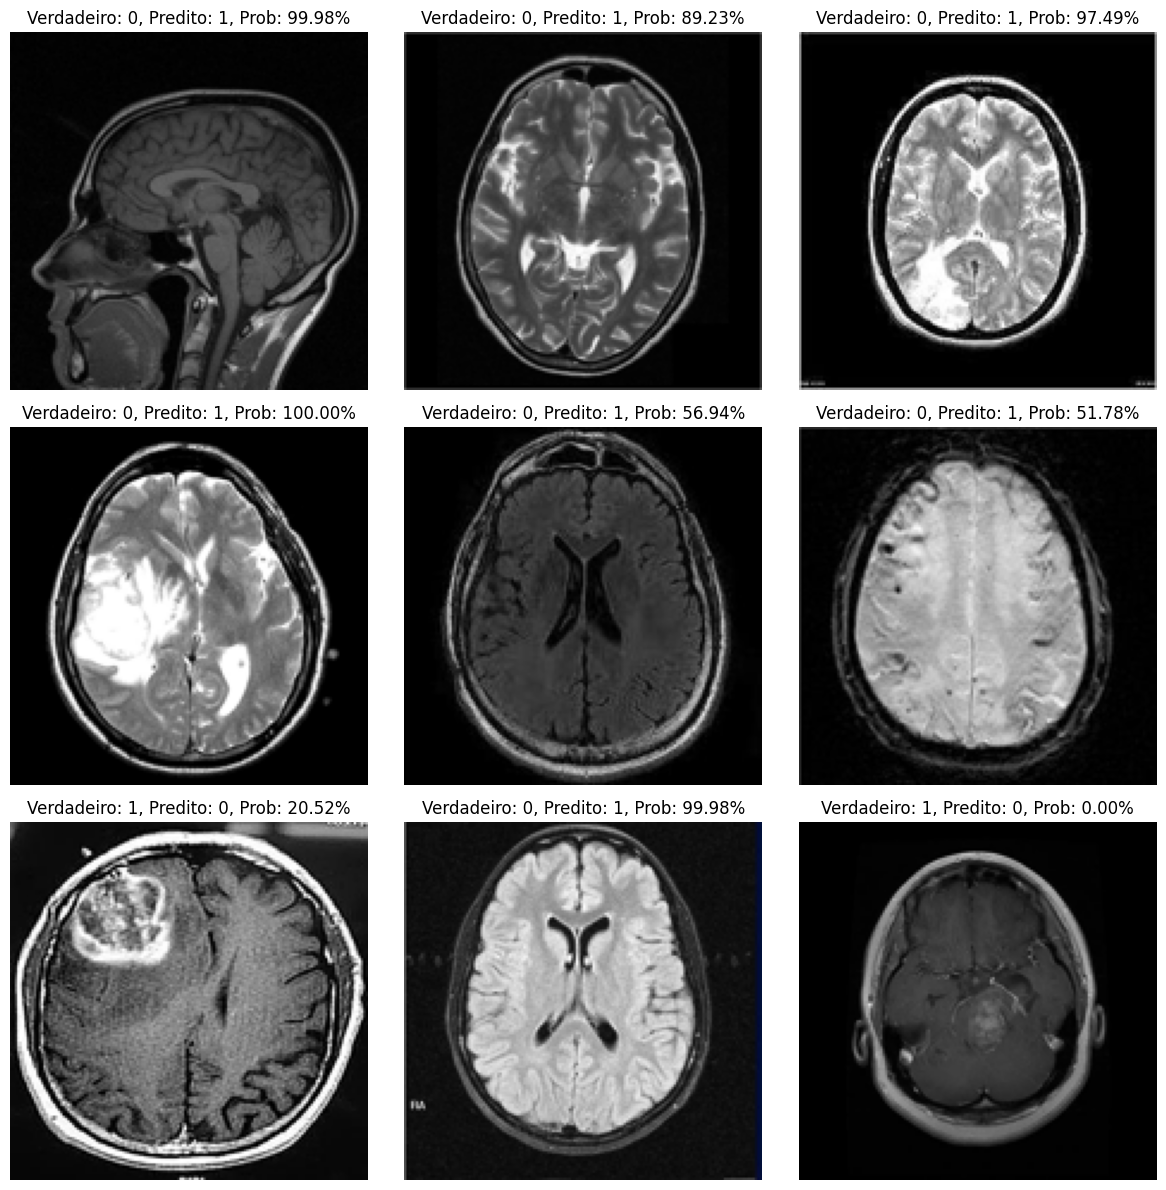

In [267]:
# Fazer previsões nos dados de teste usando o gerador de avaliação
y_pred_prob = model_cnn_4_saved_model.predict(eval_generator, steps=num_steps)

# Como o modelo produz probabilidades para classificação binária, converter para previsões binárias (0 ou 1)
y_pred_binary = (y_pred_prob > 0.5).astype(int).flatten()

# Step 3: Find the indices of misclassified images
misclassified_indices = np.where(y_pred_binary != y_test)[0]

# Step 4: Retrieve the corresponding misclassified images from the generator (assuming the generator provides both images and labels)
misclassified_images = []
batch_size = eval_generator.batch_size

# Iterate over the generator using a loop to get the data for each batch
for eval_generator_idx in range(num_steps):
    eval_batch = next(eval_generator)  # Get the next batch of data
    batch_indices = np.arange(eval_generator_idx * batch_size, (eval_generator_idx + 1) * batch_size)

    for idx in batch_indices:
        if idx in misclassified_indices:
            misclassified_images.append(eval_batch[0][idx % batch_size])

# Step 5: Get the corresponding true and predicted labels for misclassified images
misclassified_true_labels = y_test.iloc[misclassified_indices]
misclassified_predicted_labels = y_pred_binary[misclassified_indices]
misclassified_prob =  y_pred_prob[misclassified_indices]


# Step 6: Plot the misclassified images
plt.figure(figsize=(12, 12))
for i, img in enumerate(misclassified_images[:]):  # Limit to first 9 misclassified images
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    formatted_prob = "{:.2%}".format(misclassified_prob[i][0])
    plt.title(f"Verdadeiro: {misclassified_true_labels.iloc[i]}, Predito: {misclassified_predicted_labels[i]}, Prob: {formatted_prob}")
    plt.axis('off')

plt.tight_layout()
plt.show()


Ao observar estes erros, percebe-se que em dois deles a probabilidade ficou em torno de 50%, ou seja, perto da margem de corte e o modelo ficou "em dúvida". Em uma outra imagem, o cérebro apresenta uma cor mais clara bem grande aparentemente diferente do resto, o que gerou um falso positivo. Já outra imagem está em visão lateral, a qual a base apresenta poucas amostras, o que justifica a dificuldade do modelo em prever. Por fim, em um dos falsos negativos o modelo ainda indicou uma probabilidade 20% de tumor e no outro a coloração do tumor está bem menos destacável perante ao resto.

>> Exempos de predições do Modelo definido no projeto

1/1 [==============================] - 0s 28ms/step


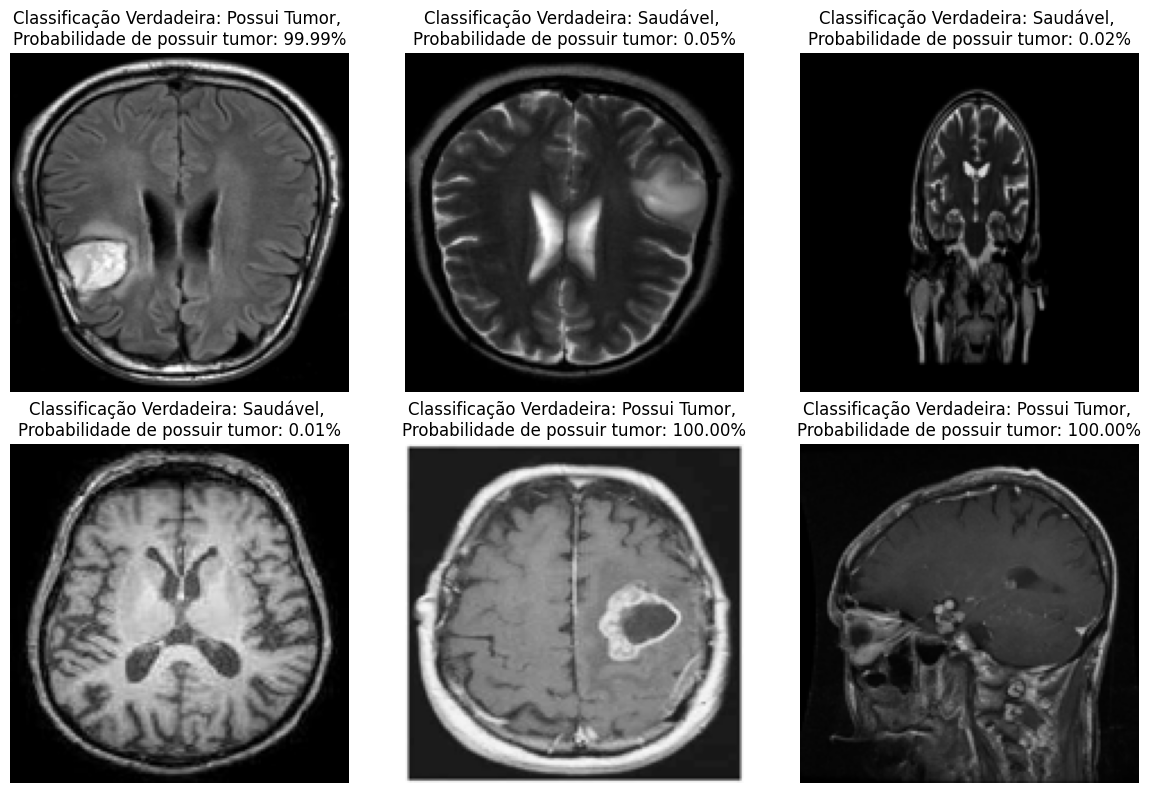

In [266]:
# Generate six unique random indices
random_indices = random.sample(range(len(bt)), 6)

# Plot six random images
plt.figure(figsize=(12, 8))
for i, idx in enumerate(random_indices):
    # Select image at the random index
    imagem_bt = bt.iloc[idx]

    # Get the classification
    classificacao = str(imagem_bt['tumor']).replace("0", "Saudável").replace("1", "Possui Tumor")

    #pegar a imagem
    imagem_interesse = imagem_bt['image']
    imagem_interesse = imagem_interesse.convert('RGB').resize((largura_imagem, altura_imagem))
    imagem_interesse_array = np.array(imagem_interesse).astype('int32')
    imagem_interesse_array = imagem_interesse_array / 255.0  # Normalizar a imagem entre 0 e 1, como foi feito durante o treinamento

    # Make the prediction using the model
    previsao = model_cnn_4_saved_model.predict(np.expand_dims(imagem_interesse_array, axis=0))

    # Format the probability as a percentage with two decimal places
    formatted_prob = "{:.2%}".format(previsao[0, 0])

    # Plot the image and the prediction
    plt.subplot(2, 3, i + 1)
    plt.imshow(imagem_interesse)
    plt.title(f"Classificação Verdadeira: {classificacao}, \nProbabilidade de possuir tumor: {formatted_prob}")
    plt.axis('off')

plt.tight_layout()
plt.show()


Por fim, foram plotadas 6 imagens aleatórias, juntamente com a sua classificação verdadeira. Além disso, foi incluída a probabilidade de haver tumor para demonstrar a efetividade preditiva do modelo.